# Fuel Consumption 2000-2022

This project will explore the data set of fuel consumption from 2000-2022. 

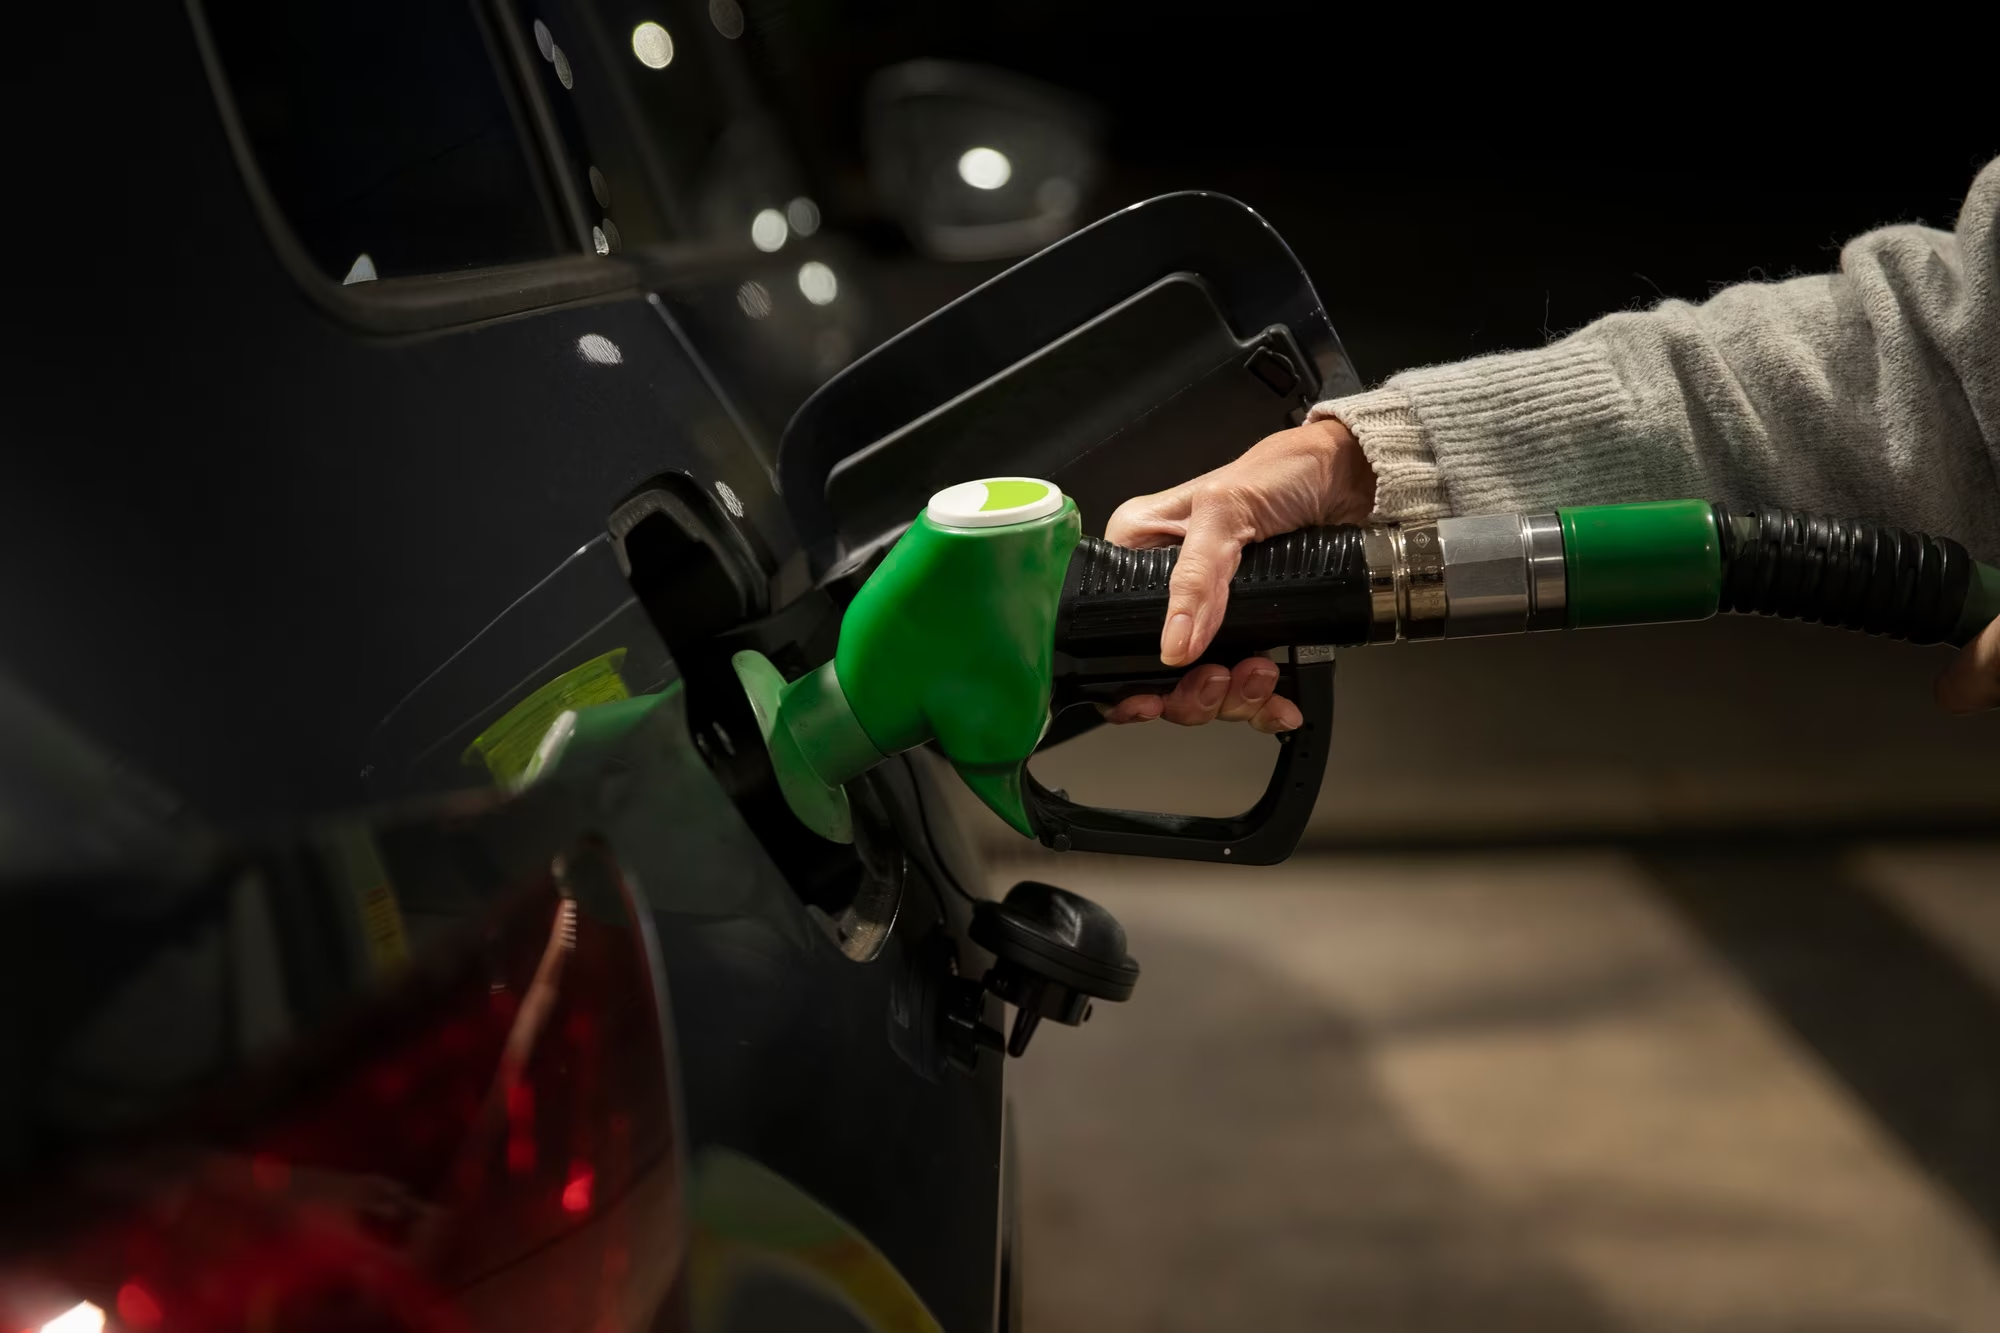

### According to Kaggle:

"Datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

To help you compare vehicles from different model years, the fuel consumption ratings for 2000 to 2022 vehicles have been adjusted to reflect the improved testing that is more representative of everyday driving. Note that these are approximate values that were generated from the original ratings, not from vehicle testing."

About the data:

        - Model -
- 4WD/4X4 = Four-wheel drive
- AWD = All-wheel drive
- CNG = Compressed natural gas
- FFV = Flexible-fuel vehicle
- NGV = Natural gas vehicle
- '#' = High output engine that provides more power than the standard engine of the same size


        - Transmission -
- A = Automatic
- AM = Automated manual
- AS = Automatic with select shift
- AV = Continuously variable
- M = Manual
- 3 - 10 = Number of gears


        - Fuel Type -
- X = Regular gasoline
- Z = Premium gasoline
- D = Diesel
- E = Ethanol (E85)
- N = Natural Gas

Fuel consumption is measured in litters per 100 kilometres (L/100km).

City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

CO2 Emissions (g/km),Estimated tailpipe carbon dioxide emissions (in grams per kilometre) are based on fuel type and the combined fuel consumption rating.


The data is from Kaggle (https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption)

## Downloading the Dataset

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [1]:
# import url
dataset_url = 'https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption' 

In [2]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./fuel-consumption" (use force=True to force download)


The dataset has been downloaded and extracted.

In [3]:
# put in directory
data_dir = './fuel-consumption/'

In [4]:
import os
os.listdir(data_dir)

['Fuel_Consumption_2000-2022.csv']

Let us save and upload our work to Jovian before continuing.

In [5]:
project_name = "zerotopandas-course-project"

In [6]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Error: The current API key is invalid or expired.


[jovian] Please enter your API key ( from https://jovian.com/ ):
API KEY: ········
[jovian] Updating notebook "imhelendang/zerotopandas-course-project" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/imhelendang/zerotopandas-course-project


'https://jovian.com/imhelendang/zerotopandas-course-project'

## Data Preparation and Cleaning

Let's clean up our data a little bit before moving forwards.


In [7]:
import pandas as pd

# loading the dataset into a data frame using Pandas
fuel_df = pd.read_csv('./fuel-consumption/Fuel_Consumption_2000-2022.csv')

In [8]:
fuel_df

YEAR   MAKE        MODEL  VEHICLE CLASS  ENGINE SIZE  CYLINDERS  \
0      2000  ACURA        1.6EL        COMPACT          1.6          4   
1      2000  ACURA        1.6EL        COMPACT          1.6          4   
2      2000  ACURA        3.2TL       MID-SIZE          3.2          6   
3      2000  ACURA        3.5RL       MID-SIZE          3.5          6   
4      2000  ACURA      INTEGRA     SUBCOMPACT          1.8          4   
...     ...    ...          ...            ...          ...        ...   
22551  2022  Volvo  XC40 T5 AWD     SUV: Small          2.0          4   
22552  2022  Volvo  XC60 B5 AWD     SUV: Small          2.0          4   
22553  2022  Volvo  XC60 B6 AWD     SUV: Small          2.0          4   
22554  2022  Volvo  XC90 T5 AWD  SUV: Standard          2.0          4   
22555  2022  Volvo  XC90 T6 AWD  SUV: Standard          2.0          4   

      TRANSMISSION FUEL  FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  \
0               A4    X               9.2             6.7              8.1   
1               M5    X               8.5             6.5              7.6   
2              AS5    Z              12.2             7.4             10.0   
3               A4    Z              13.4             9.2             11.5   
4               A4    X              10.0             7.0              8.6   
...            ...  ...               ...             ...              ...   
22551          AS8    Z              10.7             7.7              9.4   
22552          AS8    Z              10.5             8.1              9.4   
22553          AS8    Z              11.0             8.7              9.9   
22554          AS8    Z              11.5             8.4             10.1   
22555          AS8    Z              12.4             8.9             10.8   

       COMB (mpg)  EMISSIONS  
0              35        186  
1              37        175  
2              28        230  
3              25        264  
4              33        198  
...           ...        ...  
22551          30        219  
22552          30        219  
22553          29        232  
22554          28        236  
22555          26        252  

[22556 rows x 13 columns]

In [9]:
# Explore the number of rows & columns, ranges of values etc.
number_of_rows = fuel_df.shape[0]
print('There are {} rows in the dataset'.format(number_of_rows))

number_of_col = fuel_df.shape[1]
print('There are {} columns in the dataset'.format(number_of_col))


There are 22556 rows in the dataset
There are 13 columns in the dataset


In [10]:
# get the basic statistics about the dataset
fuel_df.describe()

YEAR   ENGINE SIZE     CYLINDERS  FUEL CONSUMPTION  \
count  22556.000000  22556.000000  22556.000000      22556.000000   
mean    2011.554442      3.356646      5.854141         12.763513   
std        6.298269      1.335425      1.819597          3.500999   
min     2000.000000      0.800000      2.000000          3.500000   
25%     2006.000000      2.300000      4.000000         10.400000   
50%     2012.000000      3.000000      6.000000         12.300000   
75%     2017.000000      4.200000      8.000000         14.725000   
max     2022.000000      8.400000     16.000000         30.600000   

       HWY (L/100 km)  COMB (L/100 km)    COMB (mpg)     EMISSIONS  
count    22556.000000     22556.000000  22556.000000  22556.000000  
mean         8.919126        11.034341     27.374534    250.068452  
std          2.274764         2.910920      7.376982     59.355276  
min          3.200000         3.600000     11.000000     83.000000  
25%          7.300000         9.100000     22.000000    209.000000  
50%          8.400000        10.600000     27.000000    243.000000  
75%         10.200000        12.700000     31.000000    288.000000  
max         20.900000        26.100000     78.000000    608.000000

In [11]:
# get the information about non-null counts and column data types
fuel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [12]:
# count of not-null values for each columns
fuel_df.isna().count()

YEAR                22556
MAKE                22556
MODEL               22556
VEHICLE CLASS       22556
ENGINE SIZE         22556
CYLINDERS           22556
TRANSMISSION        22556
FUEL                22556
FUEL CONSUMPTION    22556
HWY (L/100 km)      22556
COMB (L/100 km)     22556
COMB (mpg)          22556
EMISSIONS           22556
dtype: int64

Change the format for column names so that we can easily work with them.

In [13]:
fuel_df.columns = ['year', 'make', 'model', 'vehicle_class',
       'engine_size', 'cylinders', 'transmission', 'fuel',
       'fuel_consumption', 'hwy_l_100km', 'comb_l_100km', 'comb_mpg', 'emissions']

Let's check the string format.

In [14]:
fuel_df.make.unique()

array(['ACURA', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHEVROLET',
       'CHRYSLER', 'DAEWOO', 'DODGE', 'FERRARI', 'FORD', 'GMC', 'HONDA',
       'HYUNDAI', 'INFINITI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA',
       'LAND ROVER', 'LEXUS', 'LINCOLN', 'MAZDA', 'MERCEDES-BENZ',
       'NISSAN', 'OLDSMOBILE', 'PLYMOUTH', 'PONTIAC', 'PORSCHE', 'SAAB',
       'SATURN', 'SUBARU', 'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO',
       'BENTLEY', 'ROLLS-ROYCE', 'MASERATI', 'MINI', 'MITSUBISHI',
       'SMART', 'HUMMER', 'ASTON MARTIN', 'LAMBORGHINI', 'BUGATTI',
       'SCION', 'FIAT', 'RAM', 'SRT', 'ALFA ROMEO', 'GENESIS', 'Acura',
       'Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'Bugatti',
       'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford',
       'Genesis', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Maserati',
       'Mazda', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Porsche', 'Ram',
       'Rolls-Royce', 'Sub

In [15]:
fuel_df.vehicle_class.unique()

array(['COMPACT', 'MID-SIZE', 'SUBCOMPACT', 'STATION WAGON - MID-SIZE',
       'MINICOMPACT', 'TWO-SEATER', 'STATION WAGON - SMALL', 'FULL-SIZE',
       'SUV', 'VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD',
       'PICKUP TRUCK - SMALL', 'MINIVAN', 'SUV - STANDARD',
       'SPECIAL PURPOSE VEHICLE', 'SUV - SMALL', 'Compact', 'SUV: Small',
       'Two-seater', 'Mid-size', 'Minicompact', 'Subcompact',
       'Station wagon: Small', 'Full-size', 'SUV: Standard',
       'Special purpose vehicle', 'Pickup truck: Small',
       'Pickup truck: Standard', 'Minivan', 'Van: Passenger',
       'Station wagon: Mid-size'], dtype=object)

There is something wrong with the format causing duplicates. We need modify it!

In [16]:
fuel_df['make'] = fuel_df['make'].str.upper()
fuel_df['vehicle_class'] = fuel_df['vehicle_class'].str.upper()

In [17]:
fuel_df.make.unique()

array(['ACURA', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHEVROLET',
       'CHRYSLER', 'DAEWOO', 'DODGE', 'FERRARI', 'FORD', 'GMC', 'HONDA',
       'HYUNDAI', 'INFINITI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA',
       'LAND ROVER', 'LEXUS', 'LINCOLN', 'MAZDA', 'MERCEDES-BENZ',
       'NISSAN', 'OLDSMOBILE', 'PLYMOUTH', 'PONTIAC', 'PORSCHE', 'SAAB',
       'SATURN', 'SUBARU', 'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO',
       'BENTLEY', 'ROLLS-ROYCE', 'MASERATI', 'MINI', 'MITSUBISHI',
       'SMART', 'HUMMER', 'ASTON MARTIN', 'LAMBORGHINI', 'BUGATTI',
       'SCION', 'FIAT', 'RAM', 'SRT', 'ALFA ROMEO', 'GENESIS'],
      dtype=object)

In [18]:
fuel_df.vehicle_class.unique()

array(['COMPACT', 'MID-SIZE', 'SUBCOMPACT', 'STATION WAGON - MID-SIZE',
       'MINICOMPACT', 'TWO-SEATER', 'STATION WAGON - SMALL', 'FULL-SIZE',
       'SUV', 'VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD',
       'PICKUP TRUCK - SMALL', 'MINIVAN', 'SUV - STANDARD',
       'SPECIAL PURPOSE VEHICLE', 'SUV - SMALL', 'SUV: SMALL',
       'STATION WAGON: SMALL', 'SUV: STANDARD', 'PICKUP TRUCK: SMALL',
       'PICKUP TRUCK: STANDARD', 'VAN: PASSENGER',
       'STATION WAGON: MID-SIZE'], dtype=object)

Look much better now. We're ready to move forwards. But let we save our work first!

In [19]:
import jovian

In [20]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "imhelendang/zerotopandas-course-project" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/imhelendang/zerotopandas-course-project


'https://jovian.com/imhelendang/zerotopandas-course-project'

## Exploratory Analysis and Visualization

**Now let's dive deep into the data**



#### Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Let's begin with looking at the mean, sum, range and other descriptive statistics for numeric columns

In [21]:
fuel_df.describe()

year   engine_size     cylinders  fuel_consumption  \
count  22556.000000  22556.000000  22556.000000      22556.000000   
mean    2011.554442      3.356646      5.854141         12.763513   
std        6.298269      1.335425      1.819597          3.500999   
min     2000.000000      0.800000      2.000000          3.500000   
25%     2006.000000      2.300000      4.000000         10.400000   
50%     2012.000000      3.000000      6.000000         12.300000   
75%     2017.000000      4.200000      8.000000         14.725000   
max     2022.000000      8.400000     16.000000         30.600000   

        hwy_l_100km  comb_l_100km      comb_mpg     emissions  
count  22556.000000  22556.000000  22556.000000  22556.000000  
mean       8.919126     11.034341     27.374534    250.068452  
std        2.274764      2.910920      7.376982     59.355276  
min        3.200000      3.600000     11.000000     83.000000  
25%        7.300000      9.100000     22.000000    209.000000  
50%        8.400000     10.600000     27.000000    243.000000  
75%       10.200000     12.700000     31.000000    288.000000  
max       20.900000     26.100000     78.000000    608.000000

#### Let's explore the fuel consumption of different manufacturers.

In [22]:
# Let's draw separate graphs for Acura and Volvo make.
acura_df = fuel_df[fuel_df.make == 'ACURA']
volvo_df = fuel_df[fuel_df.make == 'VOLVO']
bmw_df = fuel_df[fuel_df.make == 'BMW']

# Group by year and sum fuel consumption regard of model, engine_size, etc.
acura_df = acura_df.groupby(["year"])["fuel_consumption"].sum()
volvo_df = volvo_df.groupby(["year"])["fuel_consumption"].sum()
bmw_df = bmw_df.groupby(["year"])["fuel_consumption"].sum()

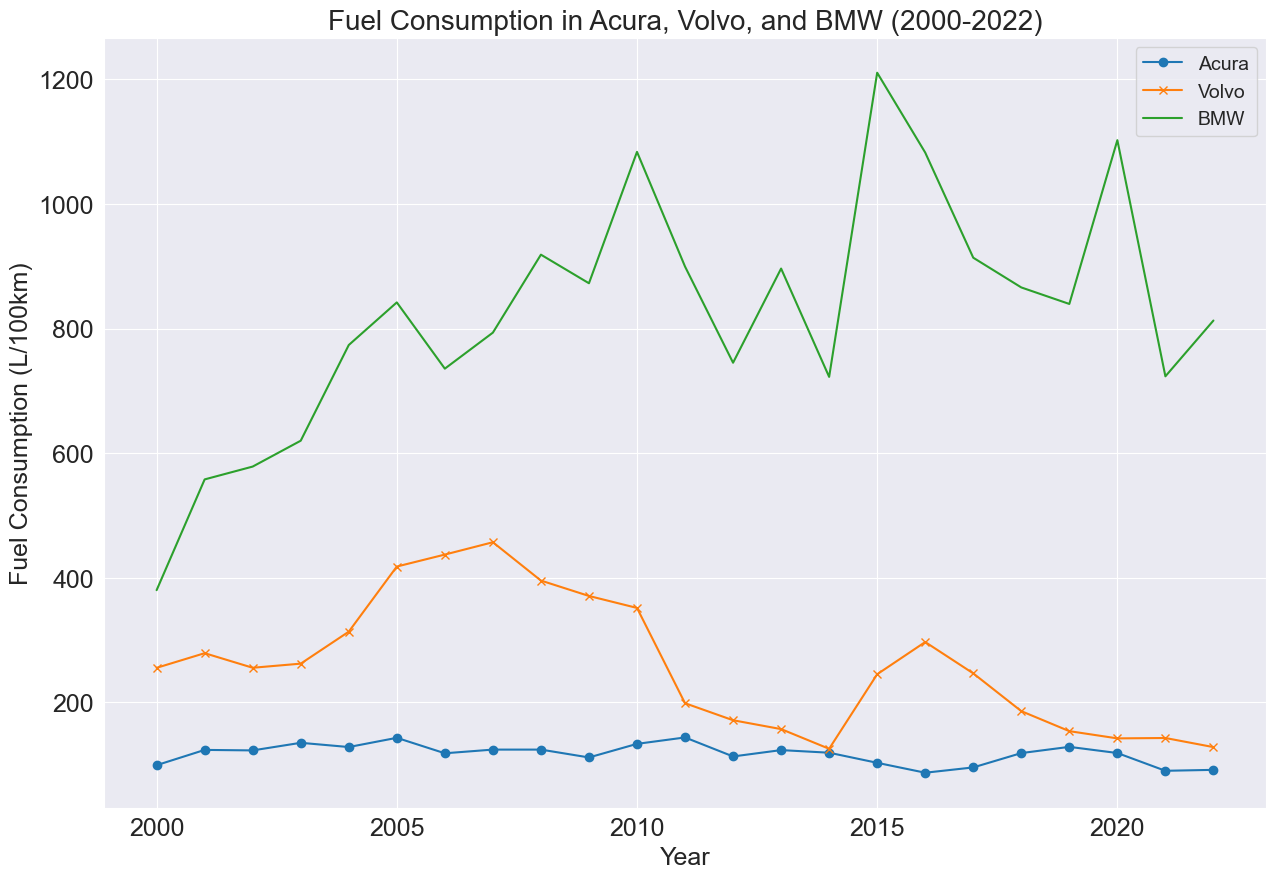

In [23]:
# set up the size and format
plt.figure(figsize=(15,10))
plt.plot(acura_df.index, acura_df, marker='o')
plt.plot(volvo_df.index, volvo_df, marker='x')
plt.plot(bmw_df.index, bmw_df)

# set up the title, label
plt.xlabel('Year', fontsize=18)
plt.ylabel('Fuel Consumption (L/100km)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

plt.title("Fuel Consumption in Acura, Volvo, and BMW (2000-2022)", fontsize=20)
plt.legend(['Acura', 'Volvo', 'BMW']);

From the chart above, we can see the huge different between the three manufacturers' fuel consumption. And, the BMW is the highest among them.

    - From 2000 to 2022, BMW cars' fuel consumption's been drastically changing. And it reached its peak in 2015. Yet, we notice a trend here. The statistic will likely go up after 2022.
    - Although Volvo consumption over the years was too drastic, somehow it was under control. And that it will go down in the next few years.
    - Lastly, Acura was able to manange the fuel consumption year by year (below 200 L/km)
    
In conclusion, in general, Acura cars tend to prioritize fuel efficiency and environmental friendliness, while BMWs tend to prioritize performance and power over fuel economy. Volvo generally fall somewhere in between, with a range of models that offer a balance between performance and fuel efficiency.

#### When analyzing car fuel consumption, we can't not discuss about car emissions. Let's take a look at Bentley cars emissions from 2000 to 2022.

In [24]:
# Let's analyze the emissions of Bentley cars.
# generate a sub table for bentley car
bentley_df = fuel_df[fuel_df.make == 'BENTLEY']
bentley_df = bentley_df.groupby(["year"])["emissions"].sum().reset_index()

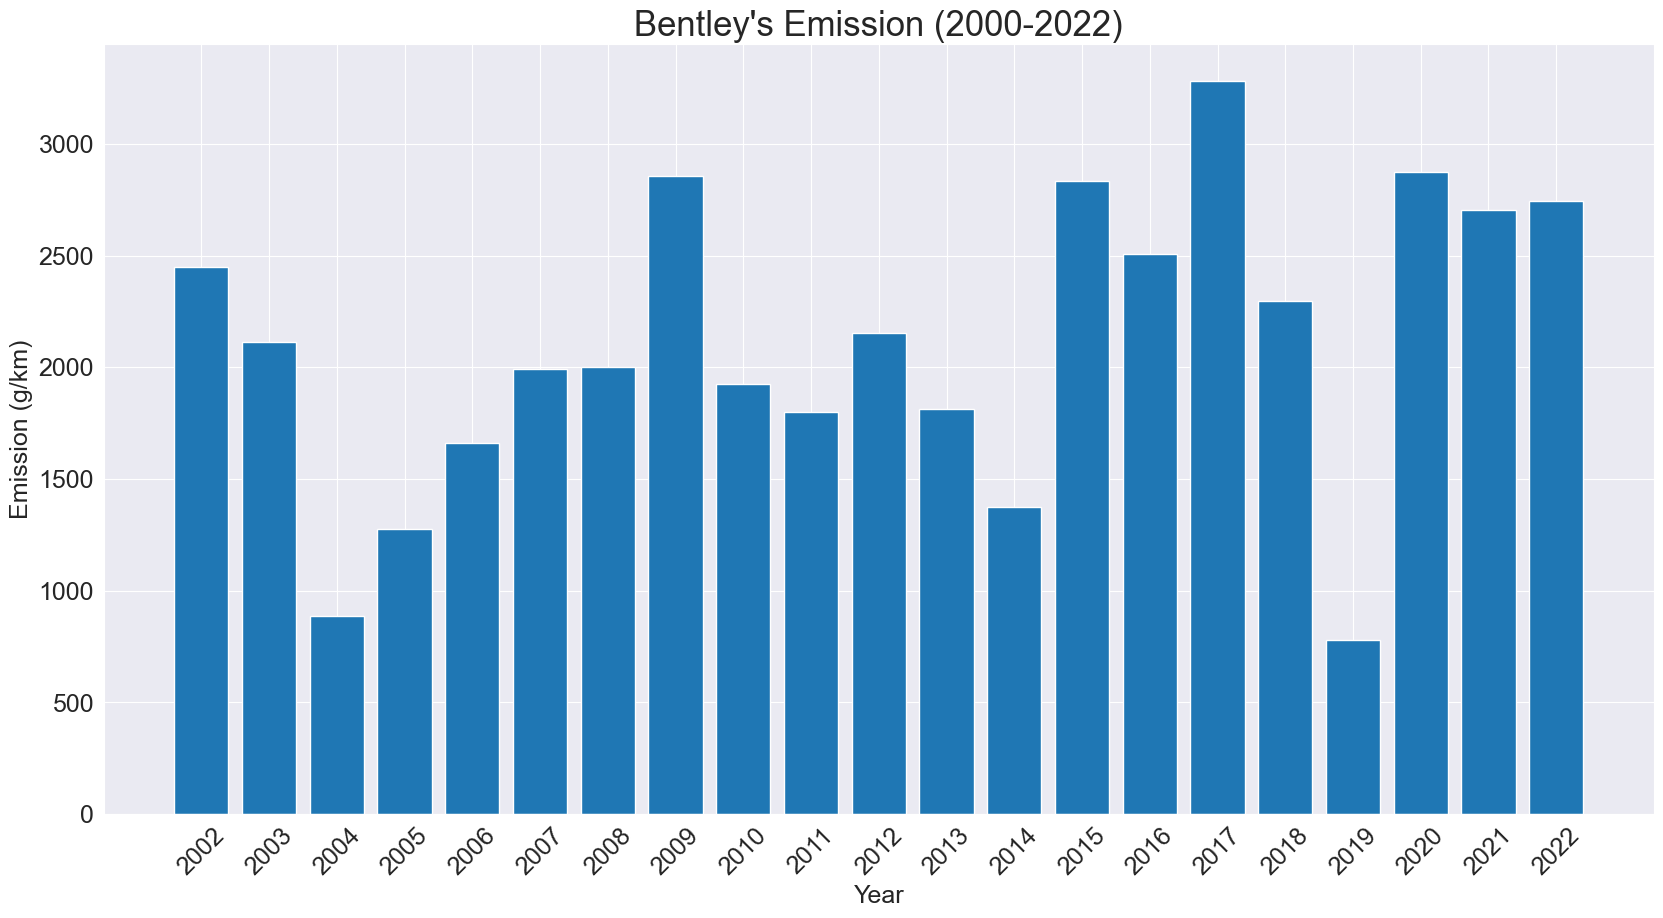

In [25]:
# set up format
fig, ax = plt.subplots(figsize=(20, 10))

# graph
plt.bar(bentley_df.iloc[:,0], bentley_df.iloc[:,1]);

# set up labels
plt.yticks(fontsize=18)
plt.ylabel('Emission (g/km)', fontsize=18)

plt.xlabel('Year', fontsize=18)
plt.xticks(bentley_df.year, fontsize=18, rotation=45)

# set up title
plt.title("Bentley's Emission (2000-2022)", fontsize=25);

In recent years, Bentley has failed to reduce their emissions. Even though they successfully managed it under 1000 g/km in 2019. Unfortunately, it went up quickly (above 2500 g/km) in the next 2 years. However, in 2020, Bentley announced its Beyond100 strategy, which includes a commitment to offering only hybrid or electric vehicles by 2026 and becoming carbon-neutral as a company by 2030. 

According to Bentley's website, its current range of vehicles produces CO2 emissions ranging from 253 to 347 g/km, depending on the model. However, this information does not provide a full picture of Bentley's emissions over the past two decades, as it only reflects its current lineup of vehicles(1).

It's important to note that emissions data for cars can be complex and dependent on various factors, such as vehicle size, weight, and engine type. Therefore, a more comprehensive analysis would require examining emissions data for specific models and configurations of Bentley cars over the years.

#### Let's explore a transmission type and its effect on fuel consumption.

In [26]:
# What are some transmissions type?
fuel_df.transmission.unique()

array(['A4', 'M5', 'AS5', 'AS4', 'M6', 'A5', 'A3', 'AS6', 'AV', 'A6',
       'AM6', 'A7', 'AM7', 'AS7', 'AS8', 'M4', 'A8', 'M7', 'AV7', 'AV8',
       'AV6', 'AM5', 'A9', 'AS9', 'AM8', 'AM9', 'AS10', 'A10', 'AV10',
       'AV1'], dtype=object)

We will focus on Automated manual (AM) transmission and analyze whether it helps reduce fuel consumption.

In [27]:
# substring to be searched
sub ='AM'
 
# creating and passinbg series to new column
am_trans_df = fuel_df[fuel_df.transmission.str.contains(sub)];
am_trans_df

year        make                       model vehicle_class  \
2138   2003         BMW                          M3    SUBCOMPACT   
2140   2003         BMW              M3 CONVERTIBLE   MINICOMPACT   
2928   2004         BMW                       325Ci    SUBCOMPACT   
2931   2004         BMW           325Ci CONVERTIBLE   MINICOMPACT   
2934   2004         BMW                        325i       COMPACT   
...     ...         ...                         ...           ...   
22432  2022     PORSCHE  Panamera Turbo S Executive     FULL-SIZE   
22433  2022     PORSCHE         Panamera Turbo S ST     FULL-SIZE   
22531  2022  VOLKSWAGEN                    Golf GTI      MID-SIZE   
22533  2022  VOLKSWAGEN                      Golf R      MID-SIZE   
22537  2022  VOLKSWAGEN                   Jetta GLI       COMPACT   

       engine_size  cylinders transmission fuel  fuel_consumption  \
2138           3.2          6          AM6    Z              13.3   
2140           3.2          6          AM6    Z              13.8   
2928           2.5          6          AM6    Z              10.6   
2931           2.5          6          AM6    Z              11.3   
2934           2.5          6          AM6    Z              10.6   
...            ...        ...          ...  ...               ...   
22432          4.0          8          AM8    Z              15.3   
22433          4.0          8          AM8    Z              15.3   
22531          2.0          4          AM7    X               9.3   
22533          2.0          4          AM7    Z              10.3   
22537          2.0          4          AM7    X               9.0   

       hwy_l_100km  comb_l_100km  comb_mpg  emissions  
2138           8.8          11.3        25        260  
2140           9.5          11.9        24        274  
2928           6.8           8.9        32        205  
2931           7.3           9.5        30        218  
2934           6.8           8.9        32        205  
...            ...           ...       ...        ...  
22432         11.2          13.5        21        326  
22433         11.2          13.5        21        326  
22531          7.0           8.3        34        194  
22533          7.7           9.1        31        213  
22537          6.5           7.9        36        185  

[1078 rows x 13 columns]

In [30]:
# counting the representation of each AM type
am_counts = am_trans_df.transmission.value_counts()
am_counts = am_counts.head(3)

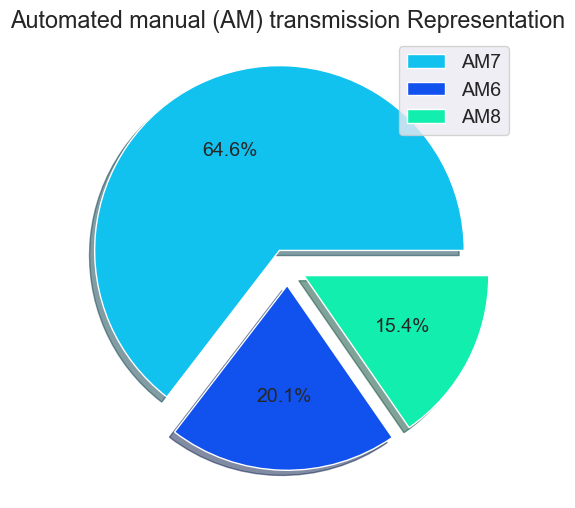

In [46]:
# set up the format
plt.figure(figsize=(12,6))
am_counts.plot(kind="pie", autopct='%1.1f%%', shadow=True, explode=(0.1, 0.1, 0.1), colors=['#11C1EE','#1152EE','#11EEAD'],
               legend=True, title='Automated manual (AM) transmission Representation', ylabel='', labeldistance=None);
ax.legend(['AM6','AM7', 'AM8'], bbox_to_anchor=(1, 1.5), loc='upper left');

The data also contains automated manual with 5 gears (AM5) and with 9 gears (AM9), which aren't displayed as their representation are less than 1%. Nonetheless, it looks like AM7 is the most commonly used than automated manual with 6 gears then with 8 gears. 
#### But is it because AM7 produces the least emission compared to the others? 

In [48]:
# create a sub table
divide_df = am_trans_df.groupby('transmission')[['fuel_consumption']].mean().reset_index()

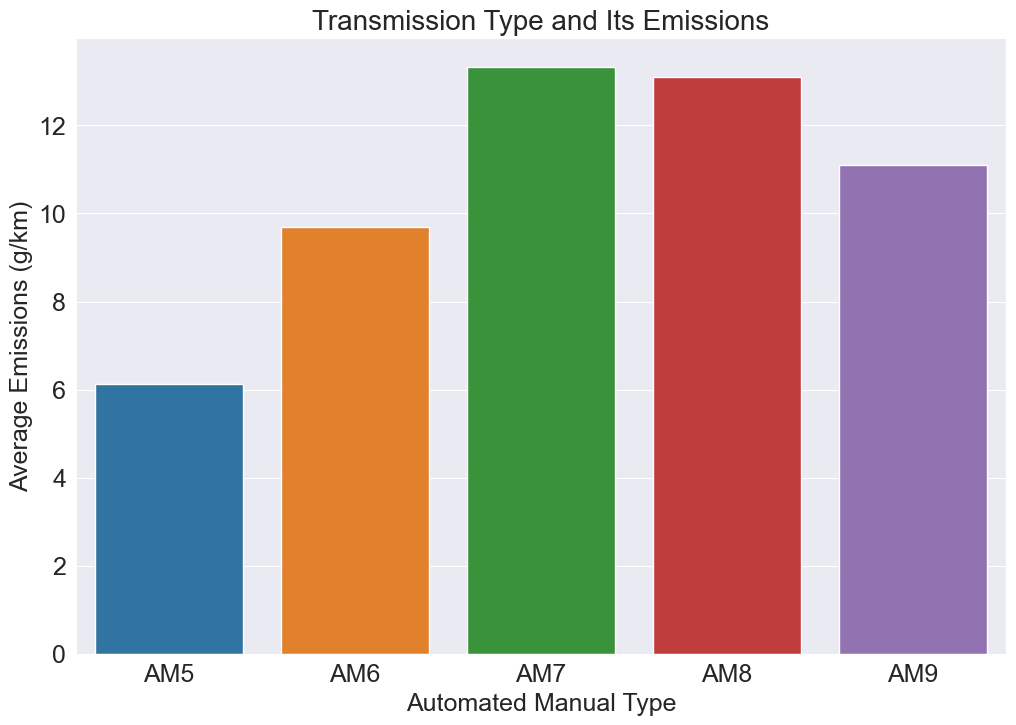

In [53]:
# set up format for the graph
plt.figure(figsize=(12,8))

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

sns.barplot(x=divide_df.transmission, y=divide_df.fuel_consumption)

plt.xlabel('Automated Manual Type', fontsize=18)
plt.ylabel('Average Emissions (g/km)', fontsize=18)

plt.title('Transmission Type and Its Emissions', fontsize=20);

- On average, this specific type of transmission or manual one in general can somewhat help with reducing the fuel consumption. 
- AMT or Automated Manual Transmission is mechanically similar to a manual transmission, except that the sensors and actuators perform the clutch work and shift gears (2).
- It is believed that cars with munual transmission consume more fuel as they increase the number of engine revs (RPM). Furthermore, the automatic transmission contains up to 9 speeds, which reduces fuel consumption, especially with the use of programs Saving fuel consumption found in modern cars (3).

#### Let's start now with analyzing if the engine size leads to increasing emission. Take Chevrolet cars in 2022 for an example.

In [54]:
# creating a sub table from the current data frame
temp_df = fuel_df.loc[(fuel_df.year == 2022) & (fuel_df.make == 'CHEVROLET')]
sub_df = temp_df[['engine_size', 'fuel_consumption']]

In [55]:
# format the data frame
sorted_sub_df = sub_df.groupby('engine_size')[['fuel_consumption']].mean().reset_index()
sorted_sub_df = sorted_sub_df.sort_values(by='engine_size')
sorted_sub_df

engine_size  fuel_consumption
0           1.2          8.000000
1           1.3          8.450000
2           1.4          8.900000
3           1.5          8.833333
4           2.0         11.120000
5           2.5         12.400000
6           2.7         13.700000
7           2.8         12.433333
8           3.0         11.125000
9           3.6         13.400000
10          5.3         16.896000
11          6.2         16.460000

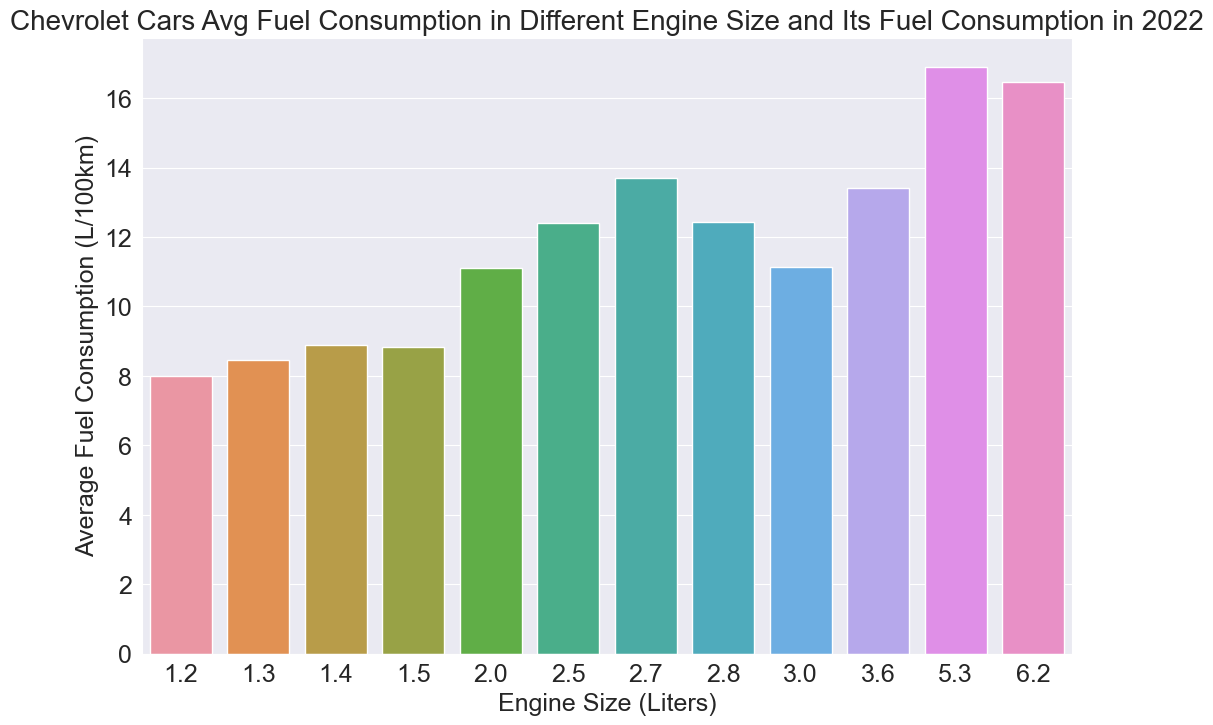

In [56]:
# set up format for the graph
plt.figure(figsize=(12,8))

# graph
sns.barplot(x='engine_size', y='fuel_consumption', data=sorted_sub_df)

# set up label and title
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

plt.xlabel('Engine Size (Liters)', fontsize=18)
plt.ylabel('Average Fuel Consumption (L/100km)', fontsize=18)

plt.title('Chevrolet Cars Avg Fuel Consumption in Different Engine Size and Its Fuel Consumption in 2022', fontsize=20);

Notice: These figures are just general estimates and the actual fuel consumption can vary based on a number of factors. Yet, we can safely assume that larger car engines consume more fuel primarily because they have more cylinders and require more fuel to power them. The more cylinders a car engine has, the more fuel it needs to combust and produce power. 

#### Before jumping to the conclusion, let's view it in another way!

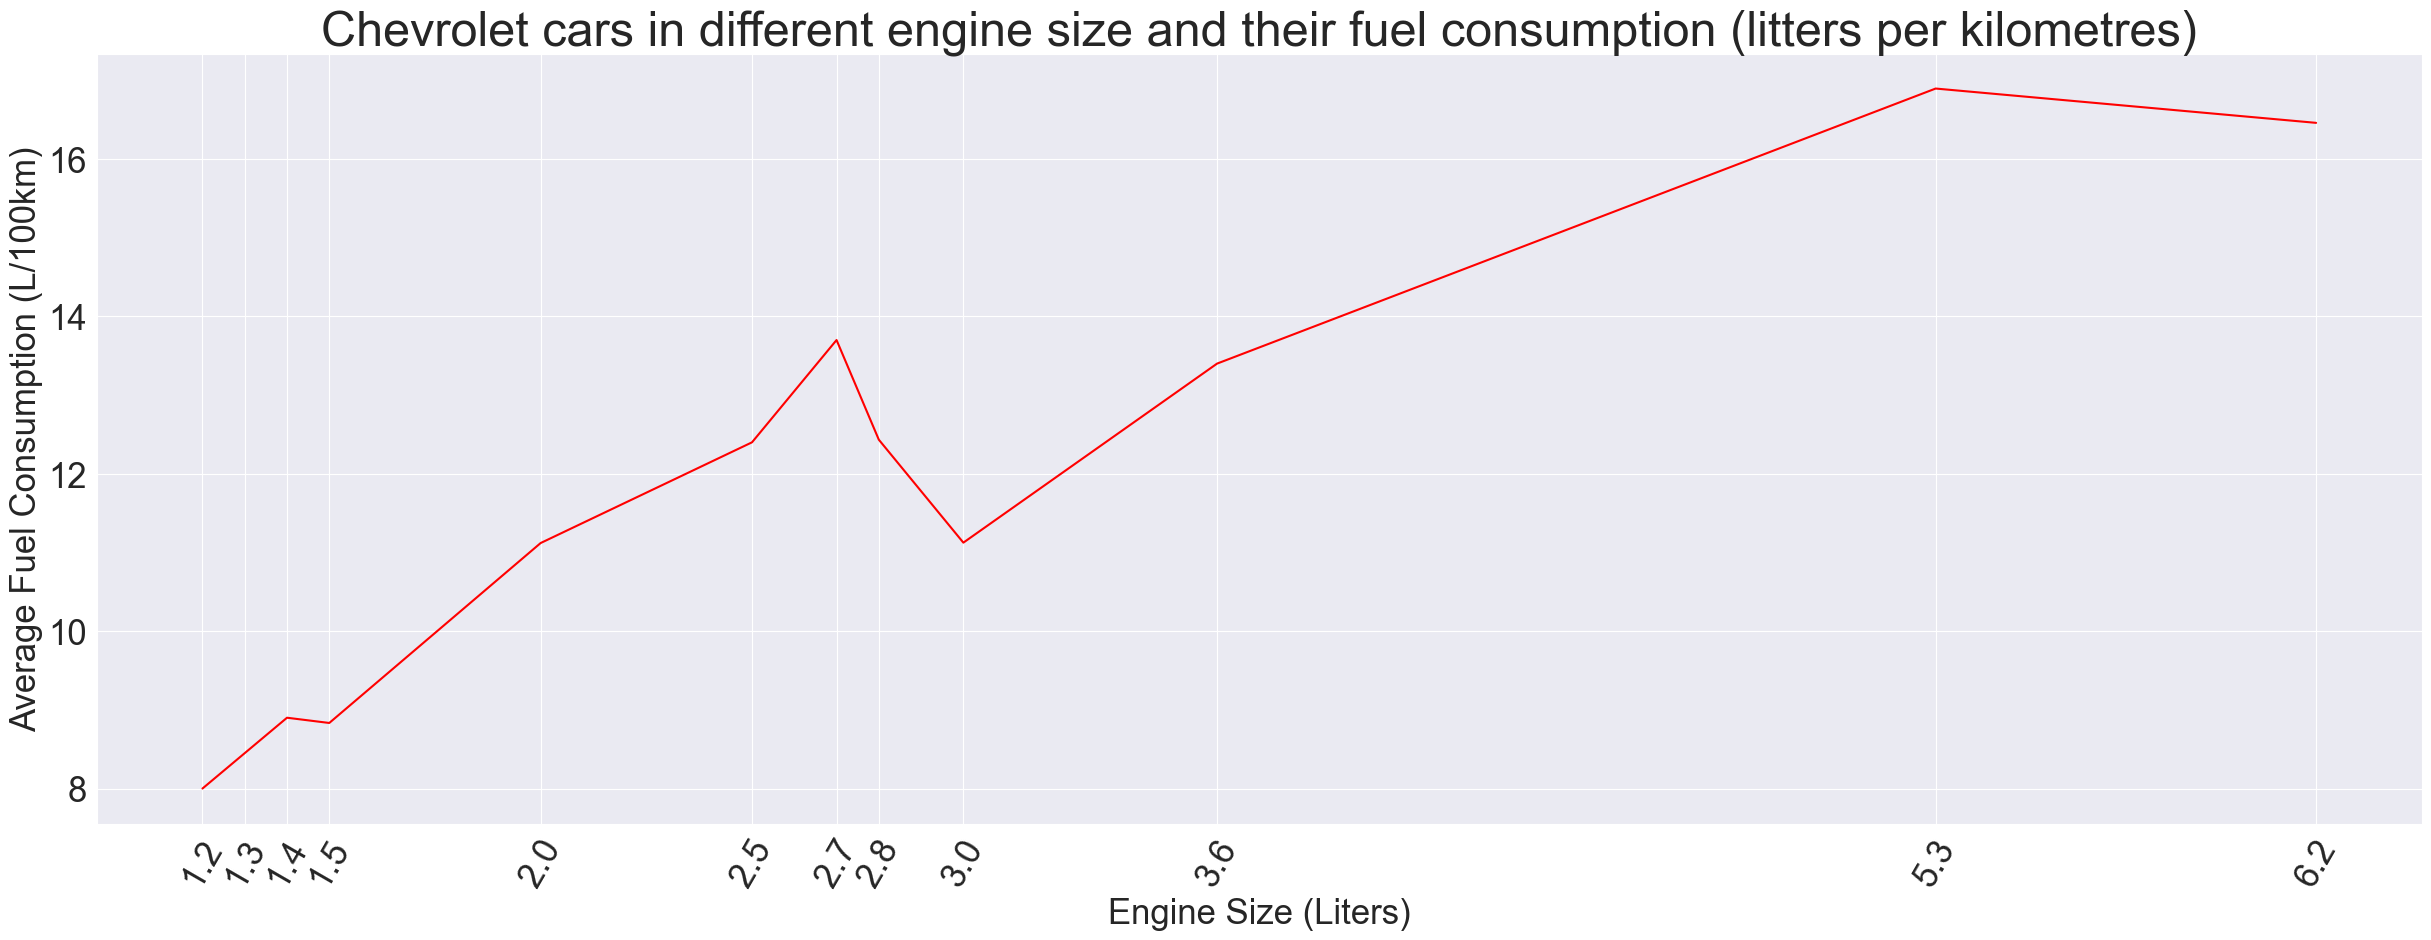

In [58]:
plt.figure(figsize=(30,10))

plt.plot(sorted_sub_df.iloc[:,0], sorted_sub_df.iloc[:,1],color='red')

plt.xlabel('Engine Size (Liters)', fontsize=25)
plt.xticks(sorted_sub_df.engine_size, fontsize=25, rotation=60)

plt.ylabel('Average Fuel Consumption (L/100km)', fontsize=25)
plt.yticks(fontsize=25)

plt.title('Chevrolet cars in different engine size and their fuel consumption (litters per kilometres)', fontsize=35);

According to both graphs, we notice that:

- Small engines (1.2-1.5 liters): around 8 to below 10 litters per 100 kilometres on average
- Mid-size engines (2.0-3.6 liters): around 11 to approximately 14 litters per 100 kilometres on average
- Large engines (above 5.3 liters): more than 16 litters per 100 kilometres on average

Additionally, larger engines tend to have higher displacement, which means they can burn more fuel and air in each combustion cycle, resulting in more power and higher fuel consumption.

Furthermore, larger engines usually require more energy to move the vehicle's greater weight, which can also increase fuel consumption.

#### What about the emissions?

In [59]:
# create a sub table
em_df = (fuel_df.groupby(['year','make'])['emissions']).sum().reset_index()
sums = fuel_df.groupby(['year','make']).emissions.sum().reset_index()

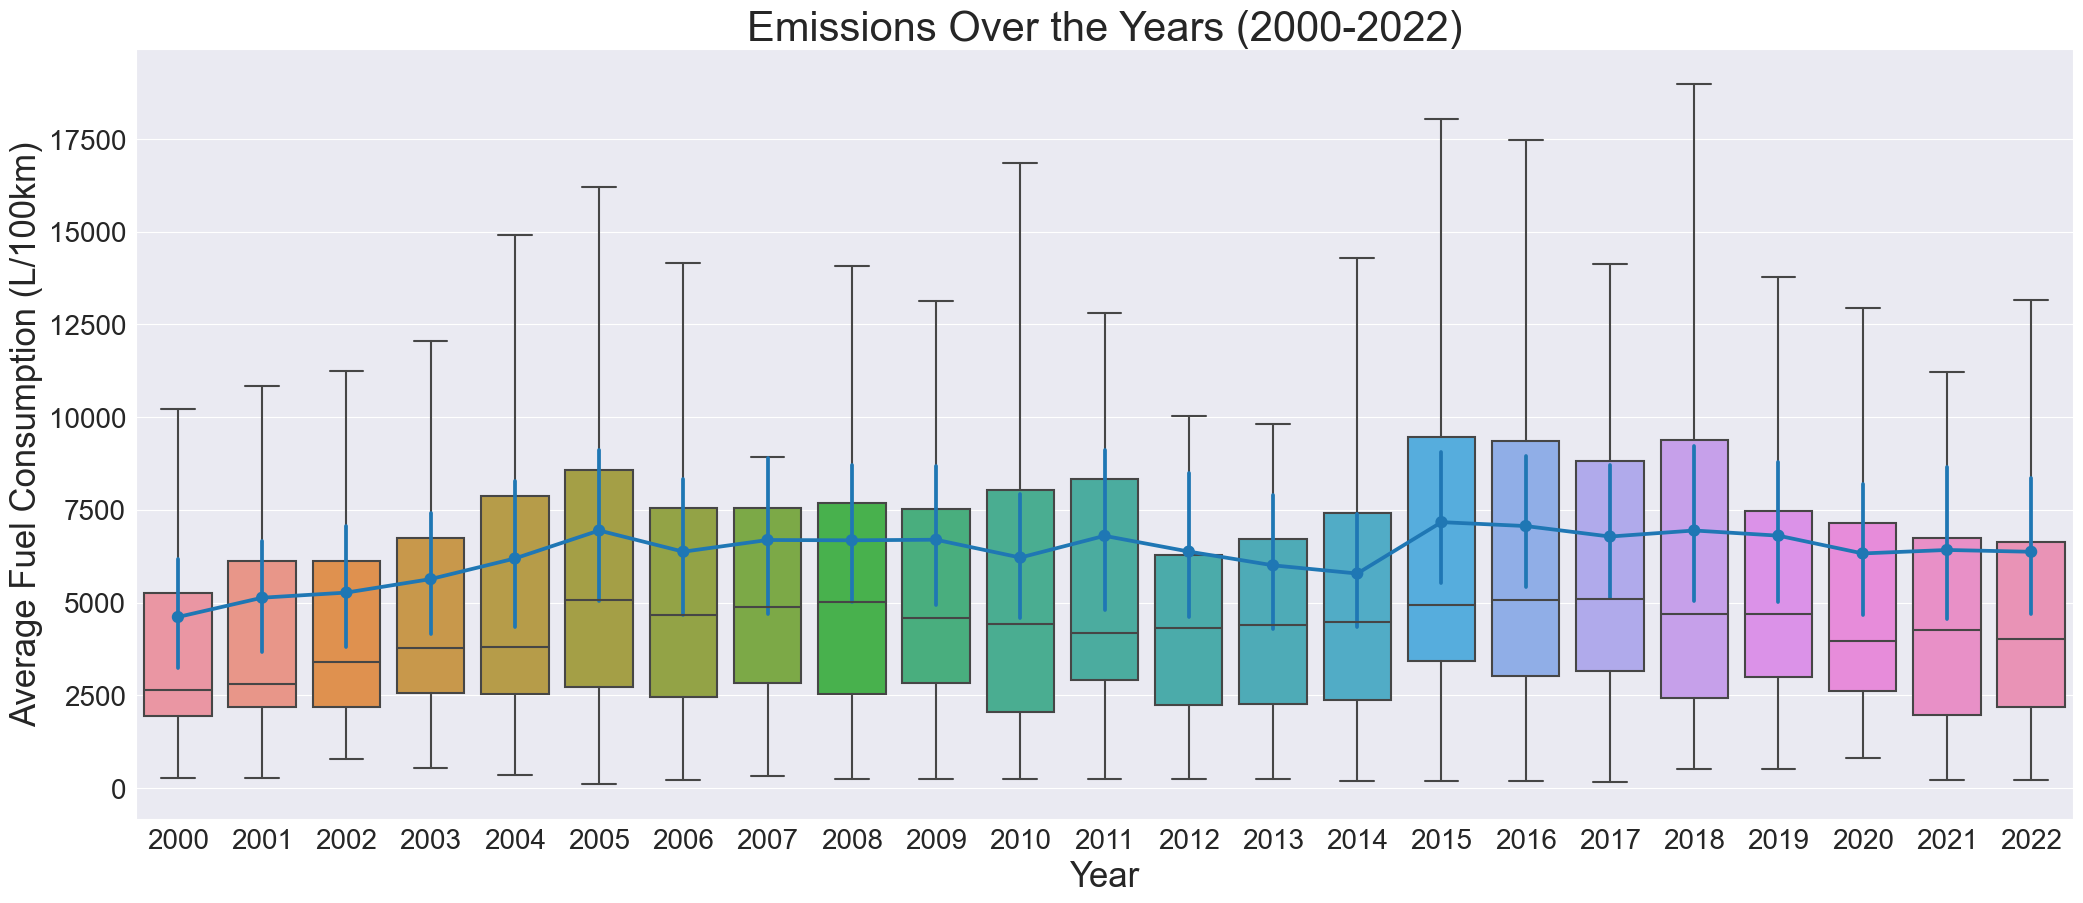

In [60]:
# set up the format for the figure 
plt.figure(figsize=(25,10))

sns.boxplot(x="year", y="emissions", data=em_df, showfliers=False) # graph the first graph
sns.pointplot(data=sums, x="year", y="emissions") 

plt.xlabel('Year', fontsize=25)
plt.xticks(fontsize=20)

plt.ylabel('Average Fuel Consumption (L/100km)', fontsize=25)
plt.yticks(fontsize=20)

plt.title('Emissions Over the Years (2000-2022)', fontsize=30);
plt.show();

From 2000 to 2022, car emissions have been a major environmental issue. The increasing number of vehicles on the road has led to a significant increase in the amount of carbon dioxide and other harmful pollutants being released into the atmosphere.

In response, the Environmental Protection Agency (EPA) introduced stricter emissions standards in 2004, known as Tier 2 standards. Despite these efforts, car emissions remain a significant environmental issue, as displayed in the graph above. The increasing popularity of SUVs and trucks, which tend to be less fuel-efficient than smaller cars, has contributed to the problem(4).

Overall, reducing car emissions remains an ongoing challenge, and continued efforts will be needed to address this important environmental issue.

It's pretty scary how much pollution we, human, can produce to the environment by using cars only. But how crazy is it? how much can we produce within a year? We will find out by comparing 2 data set, one is one year old and one is 3 months. 

Skipping, found downloaded files in "./2022-fuel-consumption-ratings" (use force=True to force download)


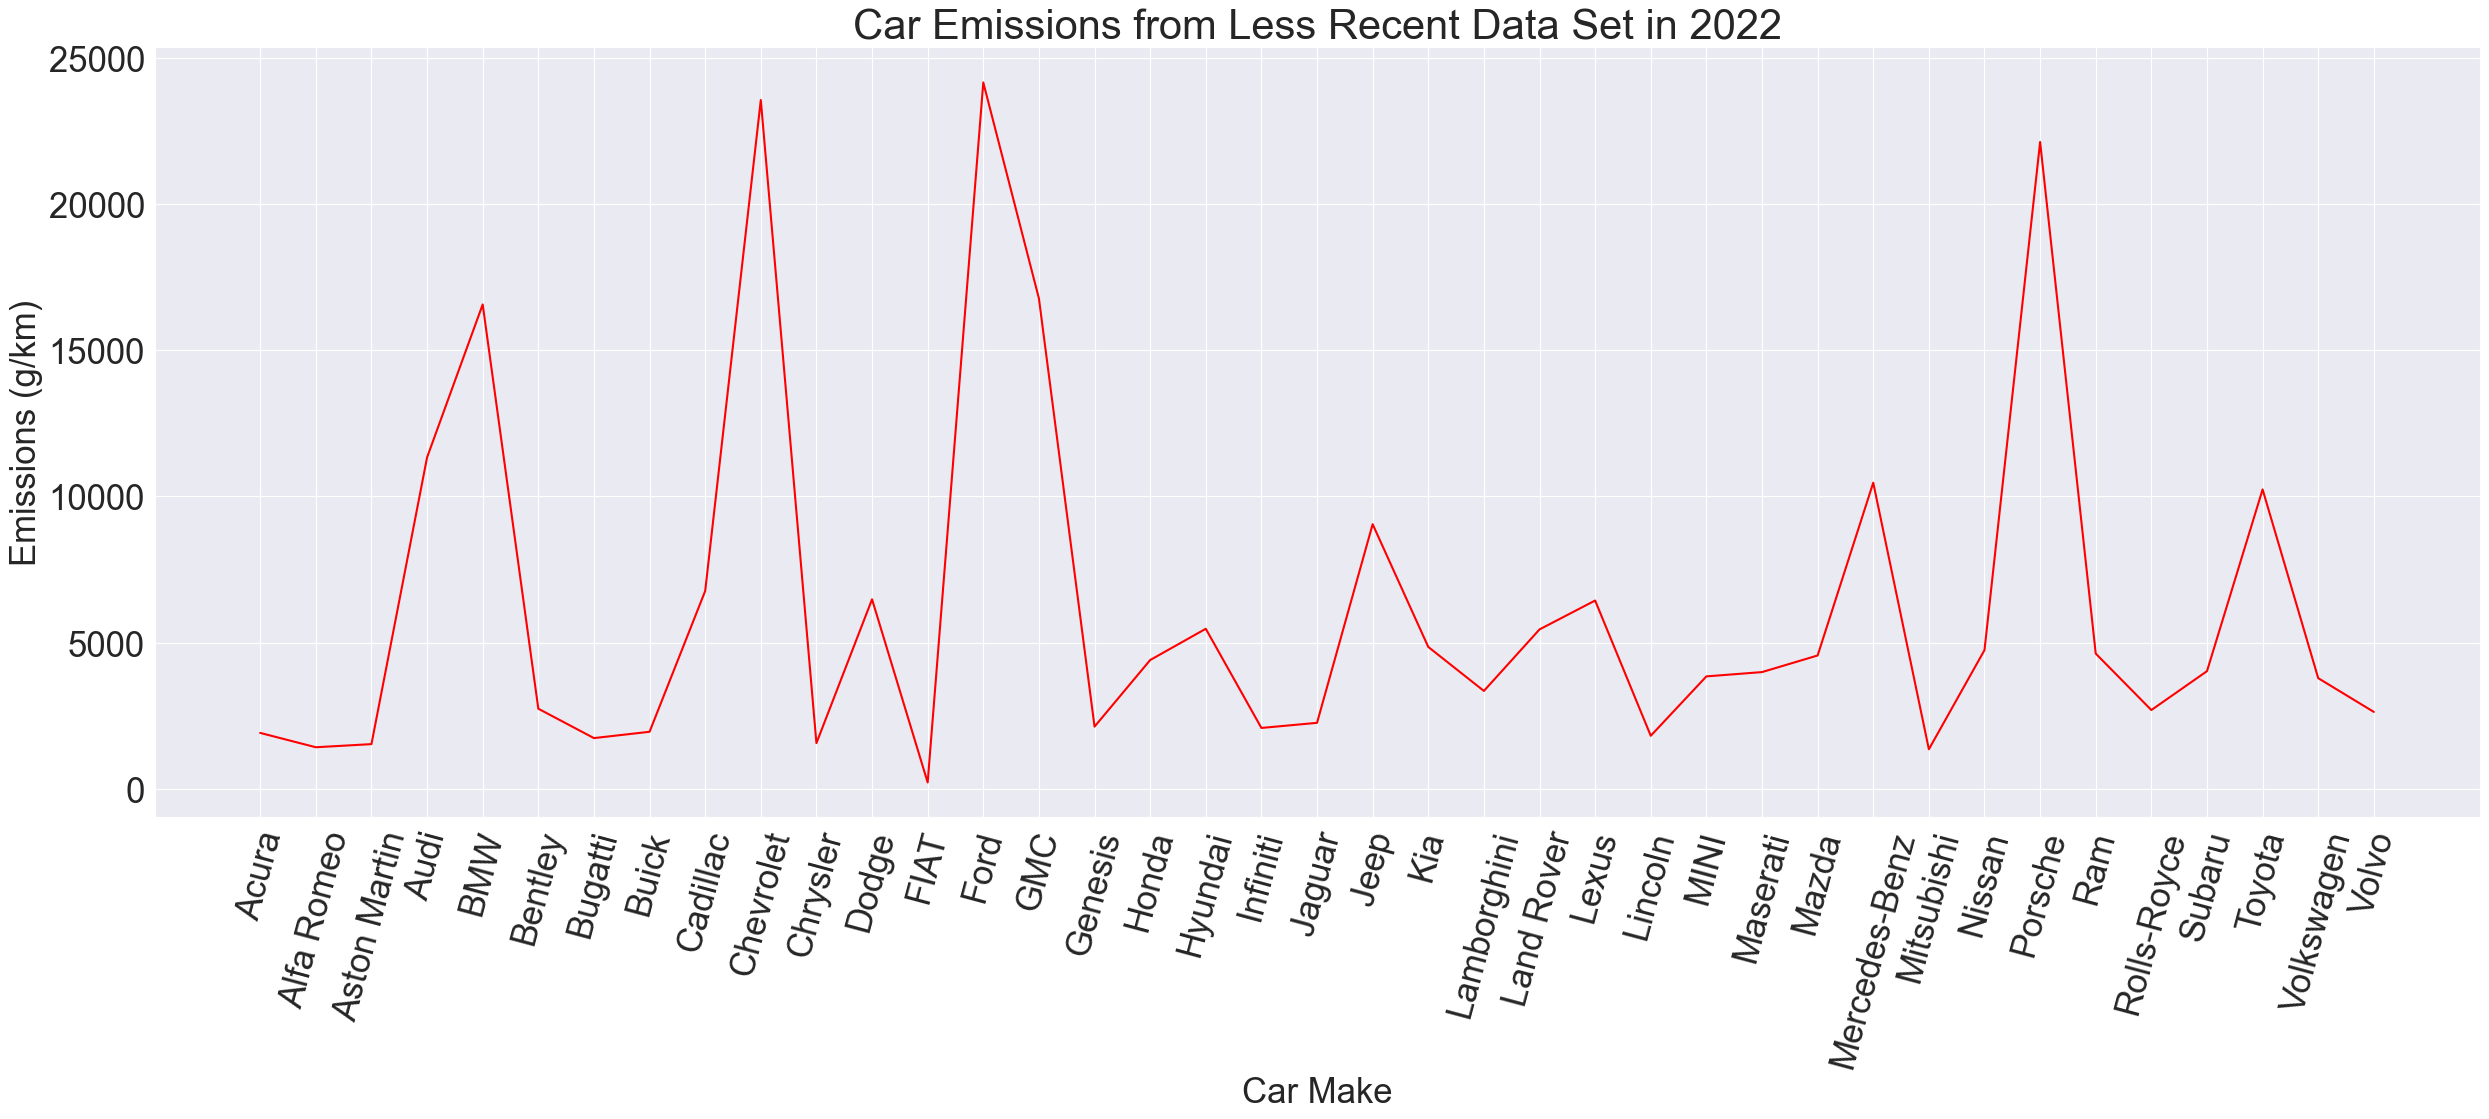

In [61]:
# data is one year old
# import url
dataset_url = 'https://www.kaggle.com/datasets/rinichristy/2022-fuel-consumption-ratings' 

# download the data set
import opendatasets as od
od.download(dataset_url)

# put in directory
data_dir = './2022-fuel-consumption-ratings/'

# import the data
import os
os.listdir(data_dir)

# loading the dataset into a data frame using Pandas
fuel2022_df = pd.read_csv('./2022-fuel-consumption-ratings/MY2022 Fuel Consumption Ratings.csv')

# reset the columns name for the compability
fuel2022_df.columns = ['year', 'make', 'model', 'vehicle_class',
       'engine_size', 'cylinders', 'transmission', 'fuel',
       'fuel_consumption', 'hwy_l_100km', 'comb_l_100km', 'comb_mpg', 'emissions','co2_rating','smog_rating']

# generate 
fuel2022_em_df = fuel2022_df.groupby('make')[['emissions']].sum().reset_index()

# skecth the graph
fig, ax = plt.subplots(figsize=(30, 10))
plt.plot(fuel2022_em_df.make, fuel2022_em_df.emissions,color='red');

plt.xlabel('Car Make', fontsize=25)
plt.xticks(fuel2022_em_df.make, fontsize=25, rotation=75)

plt.ylabel('Emissions (g/km)', fontsize=25)
plt.yticks(fontsize=25)

plt.title('Car Emissions from Less Recent Data Set in 2022', fontsize=30);


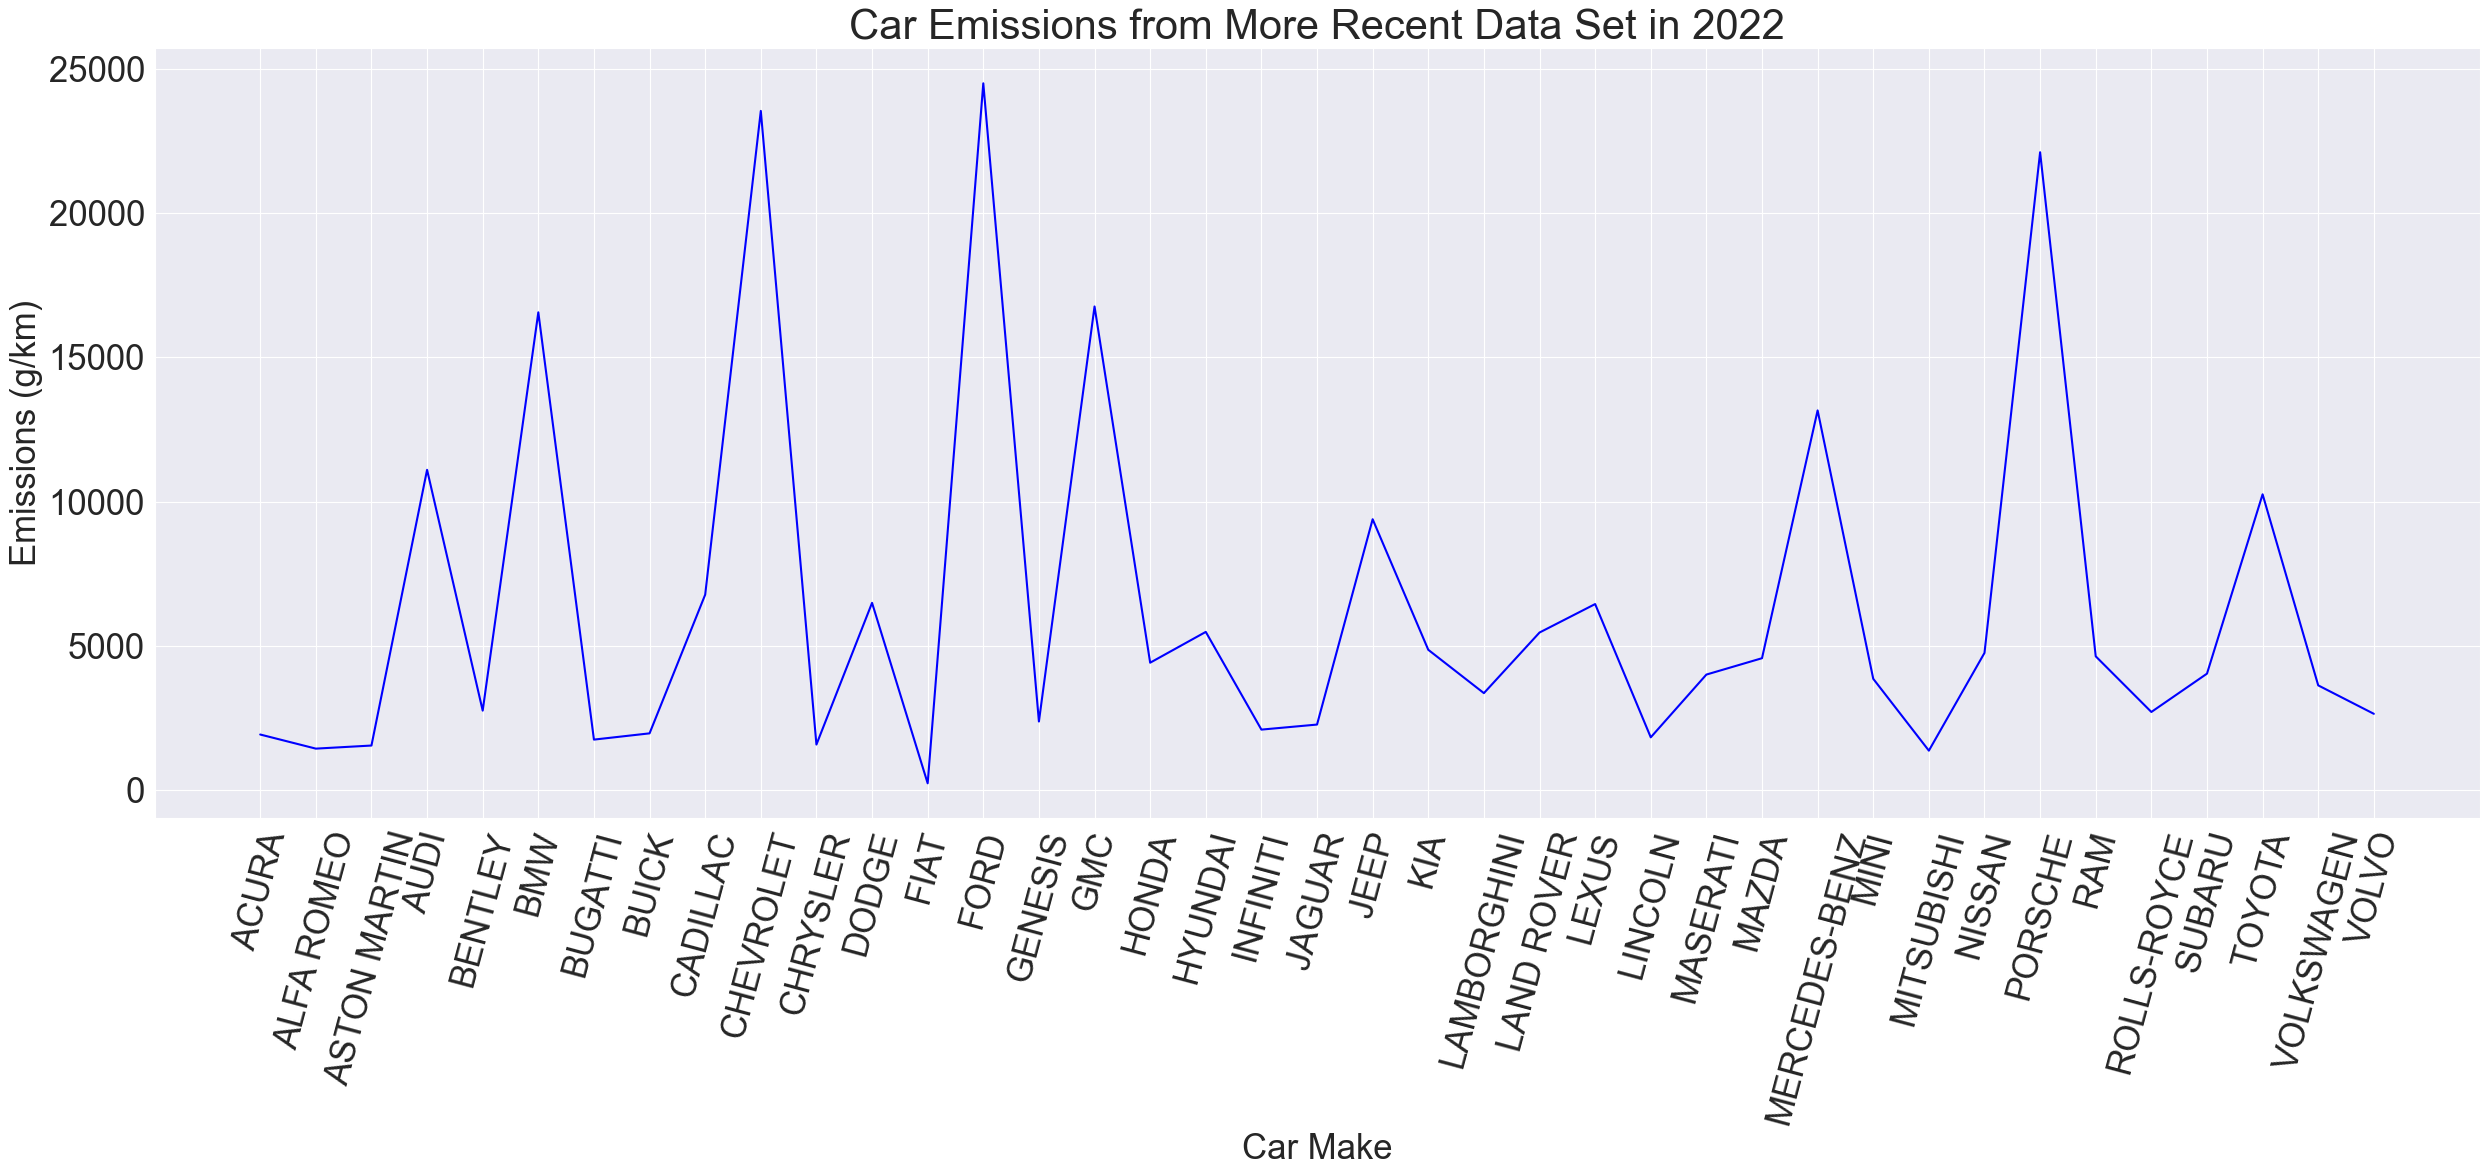

In [62]:
# extract data from the data set is 3 months old
year2022_df = fuel_df.loc[(fuel_df.year == 2022)]
year2022_df = year2022_df.groupby('make')[['emissions']].sum().reset_index()

# skecth the graph
fig, ax = plt.subplots(figsize=(30, 10))
plt.plot(year2022_df.make, year2022_df.emissions,color='blue');

plt.xlabel('Car Make', fontsize=25)
plt.xticks(year2022_df.make, fontsize=25, rotation=75)

plt.ylabel('Emissions (g/km)', fontsize=25)
plt.yticks(fontsize=25)

plt.title('Car Emissions from More Recent Data Set in 2022', fontsize=30);

### Let put them together

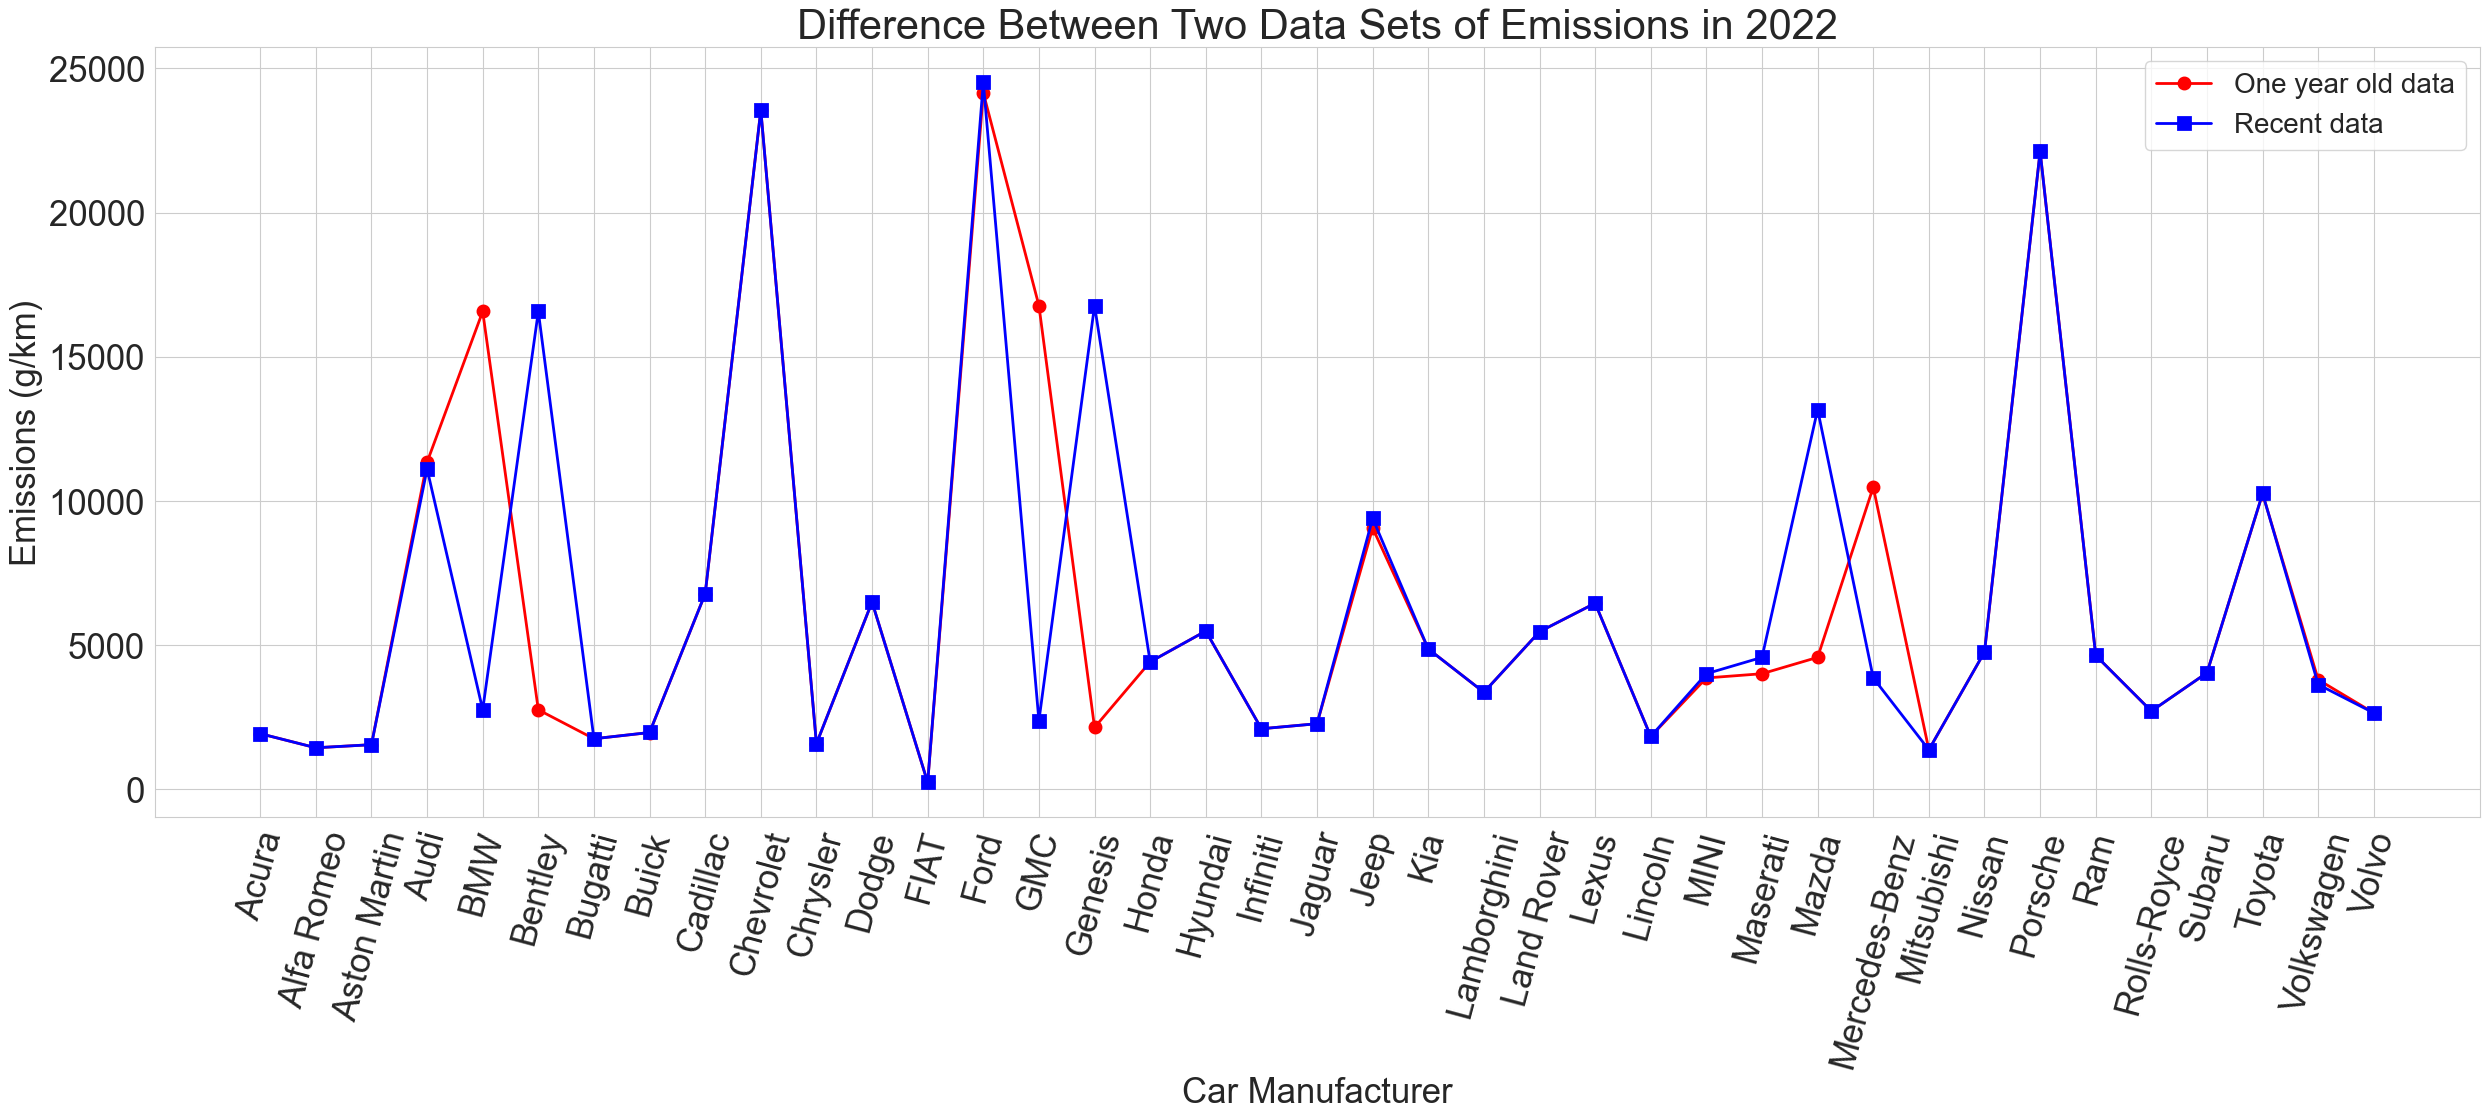

In [100]:
# set up format
fig, ax = plt.subplots(figsize=(30, 10))

# less recent data
plt.plot(fuel2022_em_df.make, fuel2022_em_df.emissions, marker='o', ls='-', lw=2, ms=8, mew=2, color='red');

# more recent data
plt.plot(fuel2022_em_df.make, year2022_df.emissions, marker='s', ls='-', lw=2, ms=8, mew=2, color='blue');

plt.xlabel('Car Manufacturer', fontsize=25)
plt.xticks(fuel2022_em_df.make, fontsize=25, rotation=75)

plt.ylabel('Emissions (g/km)', fontsize=25)
plt.yticks(fontsize=25)

plt.title('Difference Between Two Data Sets of Emissions in 2022', fontsize=30);

plt.legend(['One year old data', 'Recent data'], fontsize=20)
plt.show()

The different is pretty shoking.

    - Bentley and Genesis went over 15000 g/km (10000 g/km more compared to the old data set).
    - Mazda went over 12500 g/km (7500 g/km more).
    
Besides, there are some positive changes as well.

    - BMW released less than 5000 g/km (11000 g/km less compared to the old data set).
    - GMC released less than 5000 g/km (12000 g/km less).
    - Mercedes-Benz released around 5000 g/km (5000 g/km less).
    
Disclamer: The differences between the two data set could be a confirmation of the acutal emissions that was released from. Or, it could be the newer set contains more data versus the other. Nonetheless, further research and studies are recommended. 

### Let us save and upload our work to Jovian before continuing

In [36]:
import jovian

In [37]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "imhelendang/zerotopandas-course-project" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/imhelendang/zerotopandas-course-project


'https://jovian.com/imhelendang/zerotopandas-course-project'

## Analysing Data


#### Q1: What are top five cars that have the most fuel consumption?

In [139]:
# make a copy of current data frame
copy_df = fuel_df.copy()

In [125]:
# slicing the table
least_fuel_df = (copy_df.groupby(['year','make','model'])['fuel_consumption', 'comb_mpg']).mean().reset_index()
least_fuel_df.sort_values(by="fuel_consumption", ascending=False).head()

/var/folders/6p/xbsycnm16ls5ygb8lfftswd80000gn/T/ipykernel_11496/3447441015.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  least_fuel_df = (copy_df.groupby(['year','make','model'])['fuel_consumption', 'comb_mpg']).mean().reset_index()


year         make                    model  fuel_consumption  comb_mpg
1229   2003      FERRARI                     ENZO              30.6      11.0
12711  2021      BUGATTI         Chiron Pur Sport              30.3      11.0
13432  2022      BUGATTI       Chiron Super Sport              30.3      11.0
13431  2022      BUGATTI         Chiron Pur Sport              30.3      11.0
12974  2021  LAMBORGHINI  Aventador Sian Roadster              28.3      12.0

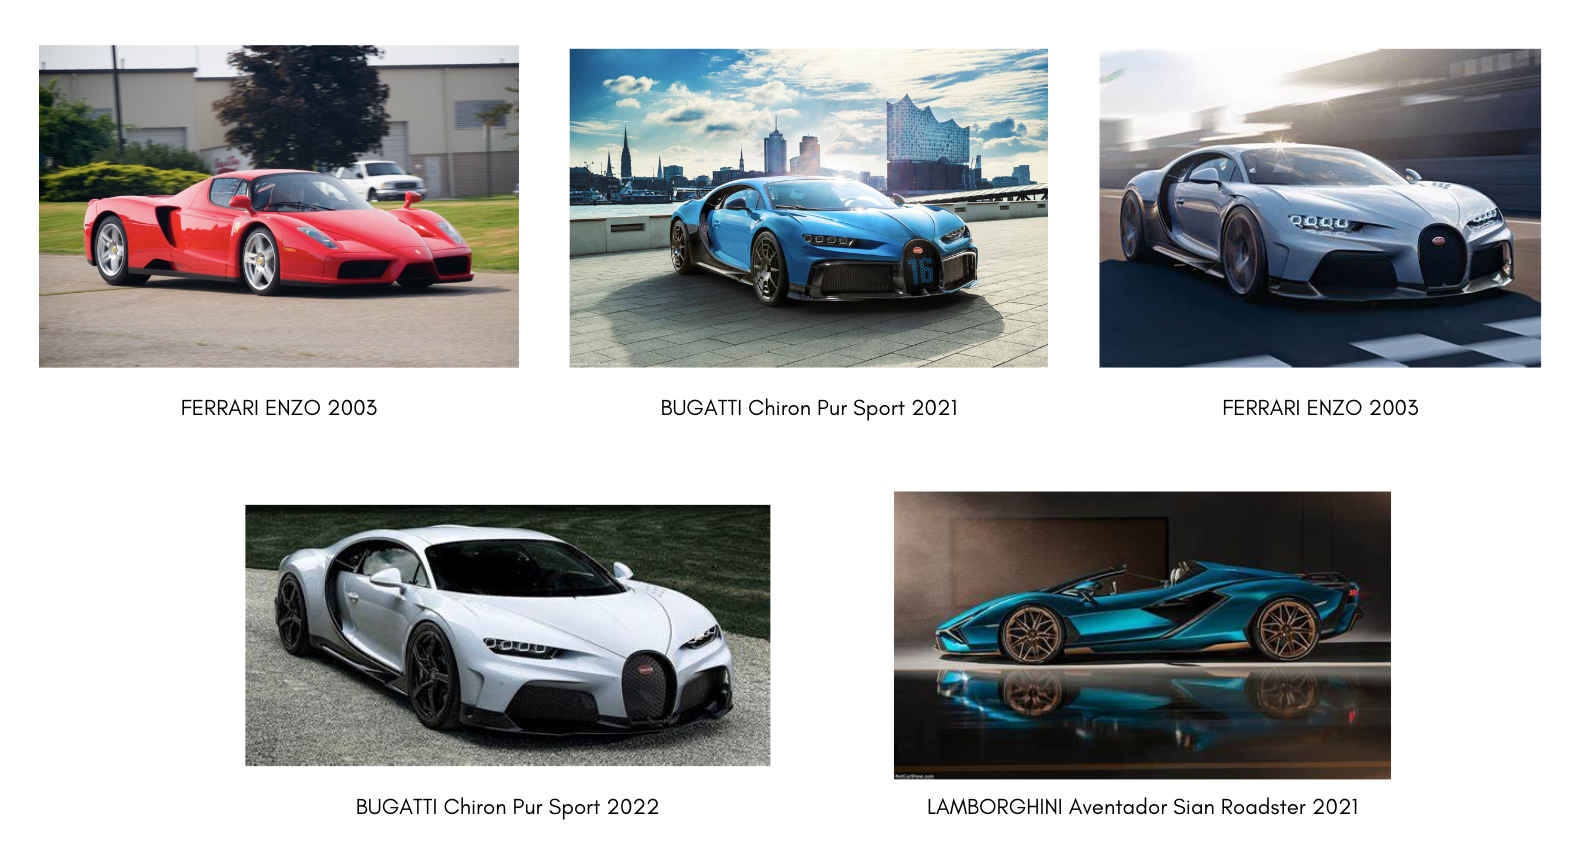

Luxury cars tend to have larger engines and heavier bodies than smaller, more fuel-efficient cars. As a result, luxury cars often consume more fuel than other types of vehicles. 

    - For instance, FERRARI ENZO 2003 is a high-performance sports car that was first introduced in 2002. Its fuel consumption is not particularly efficient due to its powerful engine and high-speed capabilities. According to official figures, the Ferrari Enzo has a fuel consumption rate of approximately 14 mpg on average.

Ultimately, the fuel consumption of a luxury car will depend on a variety of factors, including the specific model, engine type, driving style, and driving conditions. It's important for drivers to carefully consider their needs and preferences when choosing a luxury car, and to weigh the potential trade-offs between performance, luxury features, and fuel efficiency.

#### Q2: Analyze the car emissions in 2022 and compare a basic car with a luxury car of choice

 Let's say the standard car emission is 250 grams of CO2-equivalent emissions per kilometres. We will narrow down the list for 2018-2022 only.


In [126]:
# First, we need to create 2 sub data frame, one contains data for Toyota only and one is for Bugatti.
# Then, we will sum all emissions stats each year from 2018 to 2922
# narrowing down the list
narrow_df = copy_df[(copy_df['emissions'] > 250) & (copy_df.year >= 2018)]

# pick Toyota for a affordable car
toyota_df = narrow_df[narrow_df.make == 'TOYOTA']
# sum up each year
toyota_df = toyota_df.groupby('year')[['emissions']].sum().reset_index()

# pick Bugatti for a highend car
bugatti_df = narrow_df[narrow_df.make == 'BUGATTI']
# sum up each year
bugatti_df = bugatti_df.groupby('year')[['emissions']].sum()

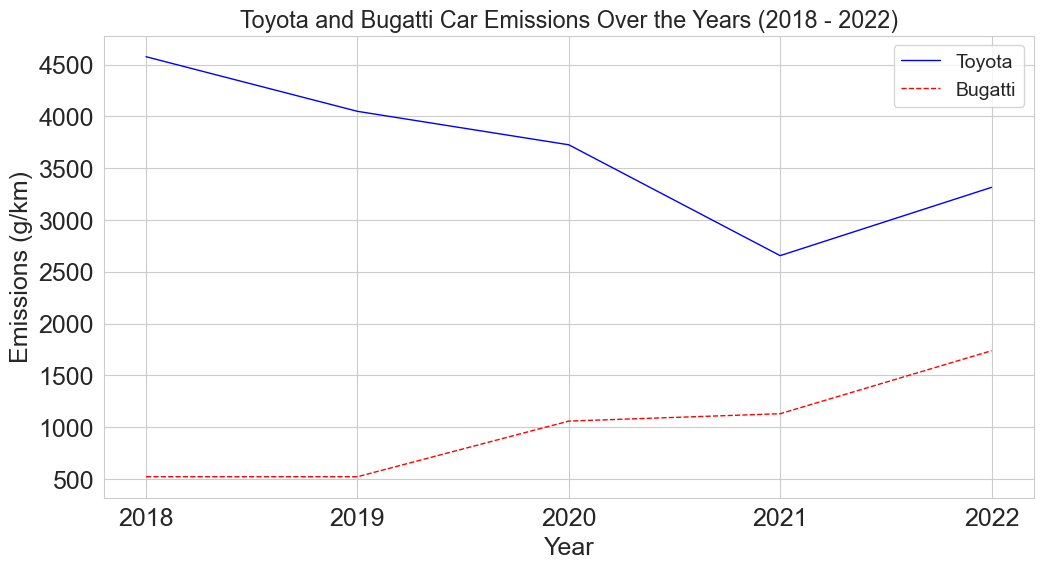

In [127]:
# set up the format
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# start plotting
plt.plot(toyota_df.year, toyota_df.emissions, 'b-', linewidth=1, markersize=5, markeredgewidth=2, markeredgecolor='navy')
plt.plot(toyota_df.year, bugatti_df.emissions, 'r--', linewidth=1, markersize=5,)

# format labels and title
plt.xlabel('Year', fontsize=18)
plt.xticks(toyota_df.year, fontsize=18)

plt.ylabel('Emissions (g/km)', fontsize=18)
plt.yticks(fontsize=18)

plt.title("Toyota and Bugatti Car Emissions Over the Years (2018 - 2022)")
plt.legend(['Toyota', 'Bugatti']);

- Toyota is one of the world's largest car manufacturers and has a diverse range of vehicles, including hybrid and electric cars. According to the company's sustainability report, Toyota has been working to reduce the CO2 emissions of its vehicles for many years. In 2021, the total CO2 emissions from Toyota's vehicles sold in Canada were below 3000 g/km, which was a breakthrough compared to 2018 (around 4500 g/km). Toyota has also set a target to reduce the average CO2 emissions of its vehicles by 90% by 2050 compared to 2018 levels(5).


- Bugatti, on the other hand, is a luxury car manufacturer that produces high-performance sports cars. Given the nature of its vehicles, it's likely that Bugatti's cars have higher emissions than Toyota's cars. In 2019, the total CO2 emissions from Bugatti's cars in Canada alone was around 500 g/km. Yet, withtin the next few years, the amount has been increasing uncontrolably (above 1500 g/km in 2022). However, on Earth day in 2021, the company reportedly commited to "pursuing a clear carbon emissions strategy"(6).

#### Q3: How do different car models compare in terms of the fuel efficiency and emissions performance of their various car models? Consider 2018 is the starting point

In [128]:
# slicing data frame
class_df = copy_df[copy_df['year'] >= 2019]
class_df = (class_df.groupby(['year','vehicle_class'])['fuel_consumption', 'emissions']).mean().unstack()

/var/folders/6p/xbsycnm16ls5ygb8lfftswd80000gn/T/ipykernel_11496/1829321830.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_df = (class_df.groupby(['year','vehicle_class'])['fuel_consumption', 'emissions']).mean().unstack()


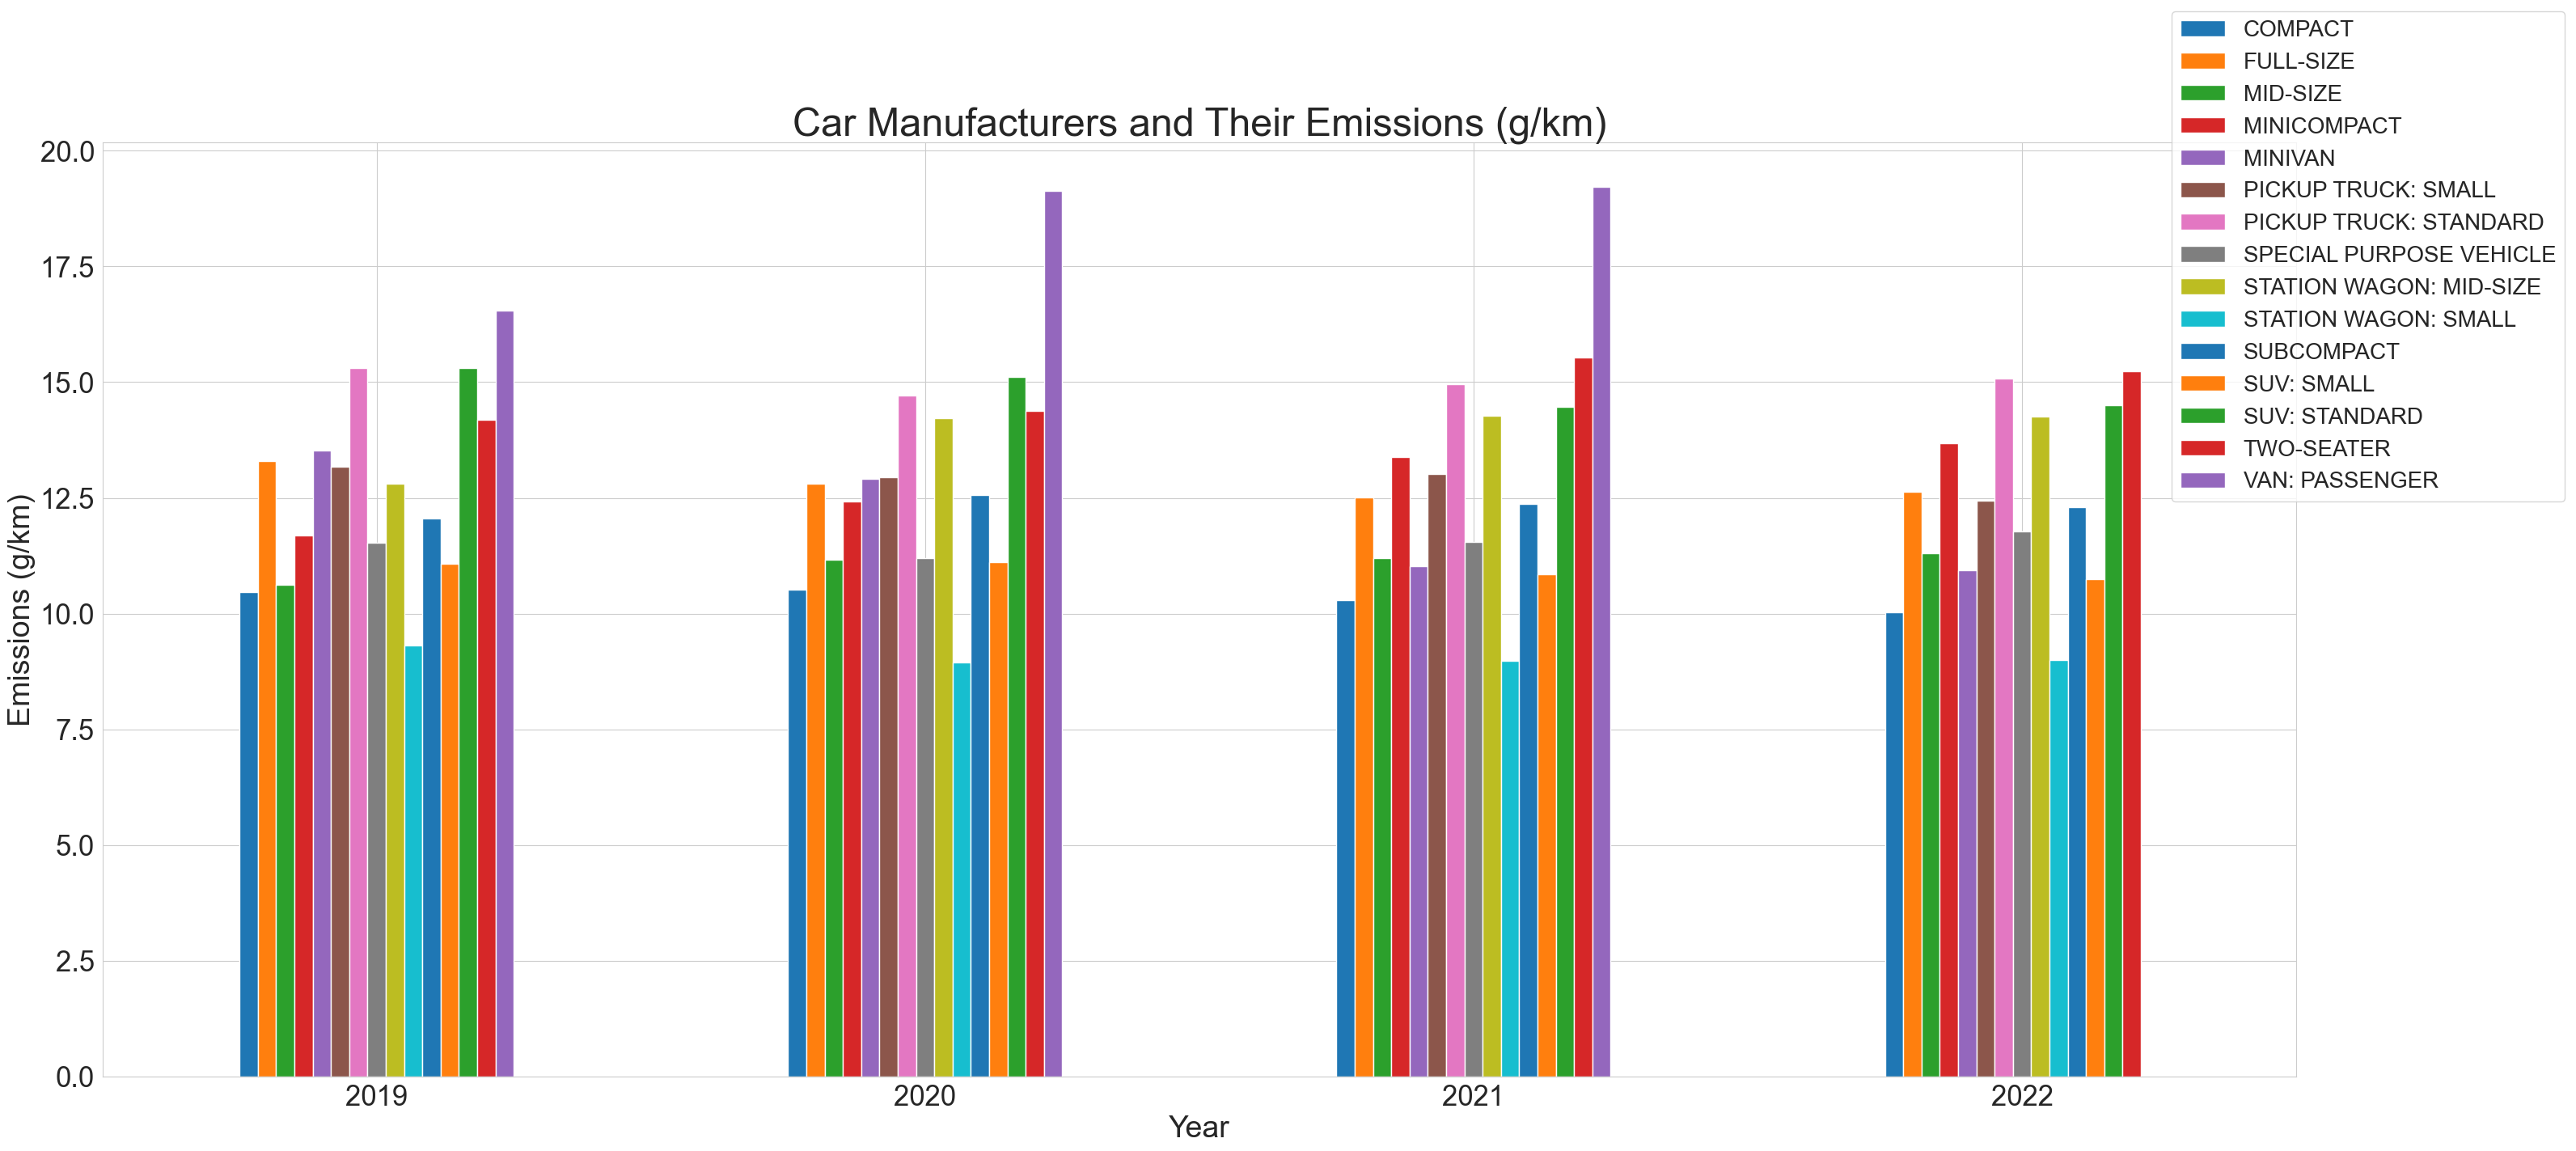

In [129]:
# Draw bar plot
fig = class_df.fuel_consumption.plot.bar(legend=False, figsize=(35,15)).figure
fig.legend(loc='upper right',fontsize=20)

# format labels and title
plt.xlabel('Year', fontsize=27)
plt.xticks(fontsize=25, rotation=0)

plt.ylabel('Emissions (g/km)', fontsize=27)
plt.yticks(fontsize=25)

plt.title("Car Manufacturers and Their Emissions (g/km)", loc='center', fontsize=35)
plt.show();

Different car models can have different engine technologies, weights, and aerodynamics that affect the fuel efficiency and emissions performance of the vehicle. 

    - For example, smaller, lighter cars like small station wagons or smal SUVs with more efficient engines generally have lower fuel consumption and emissions than larger, heavier cars such as vans with less efficient engines.

In addition, car manufacturers may design certain models to meet specific fuel efficiency and emissions standards, and may incorporate specific technologies or design features to achieve these goals. Some manufacturers may also prioritize emissions performance in certain models over others(8).

Therefore, when analyzing emissions in cars, it is important to take into account the specific car model and its unique characteristics. This can be done by collecting data on the make, model, and year of the car, as well as any specific technologies or design features that may be relevant to its emissions performance. This can help identify trends and patterns in emissions performance across different car models over time, which will be explored more in question 5.

#### Q4: Is there a correlation between the level of car emissions and the type of fuel used in cars over time?

Looking better! Now before we start sketching the graph. Just a little reminder:
- X = Regular gasoline
- Z = Premium gasoline
- D = Diesel
- E = Ethanol (E85)
- N = Natural Gas

In [130]:
# import the library
from scipy.stats import linregress

# create sub data frame
corr_df = (copy_df.groupby(['year','fuel'])['emissions']).sum().reset_index()

<AxesSubplot:title={'center':'Correlation of Emissions and Fuel Type Over Time'}, xlabel='Year', ylabel='Emissions (g/km)'>

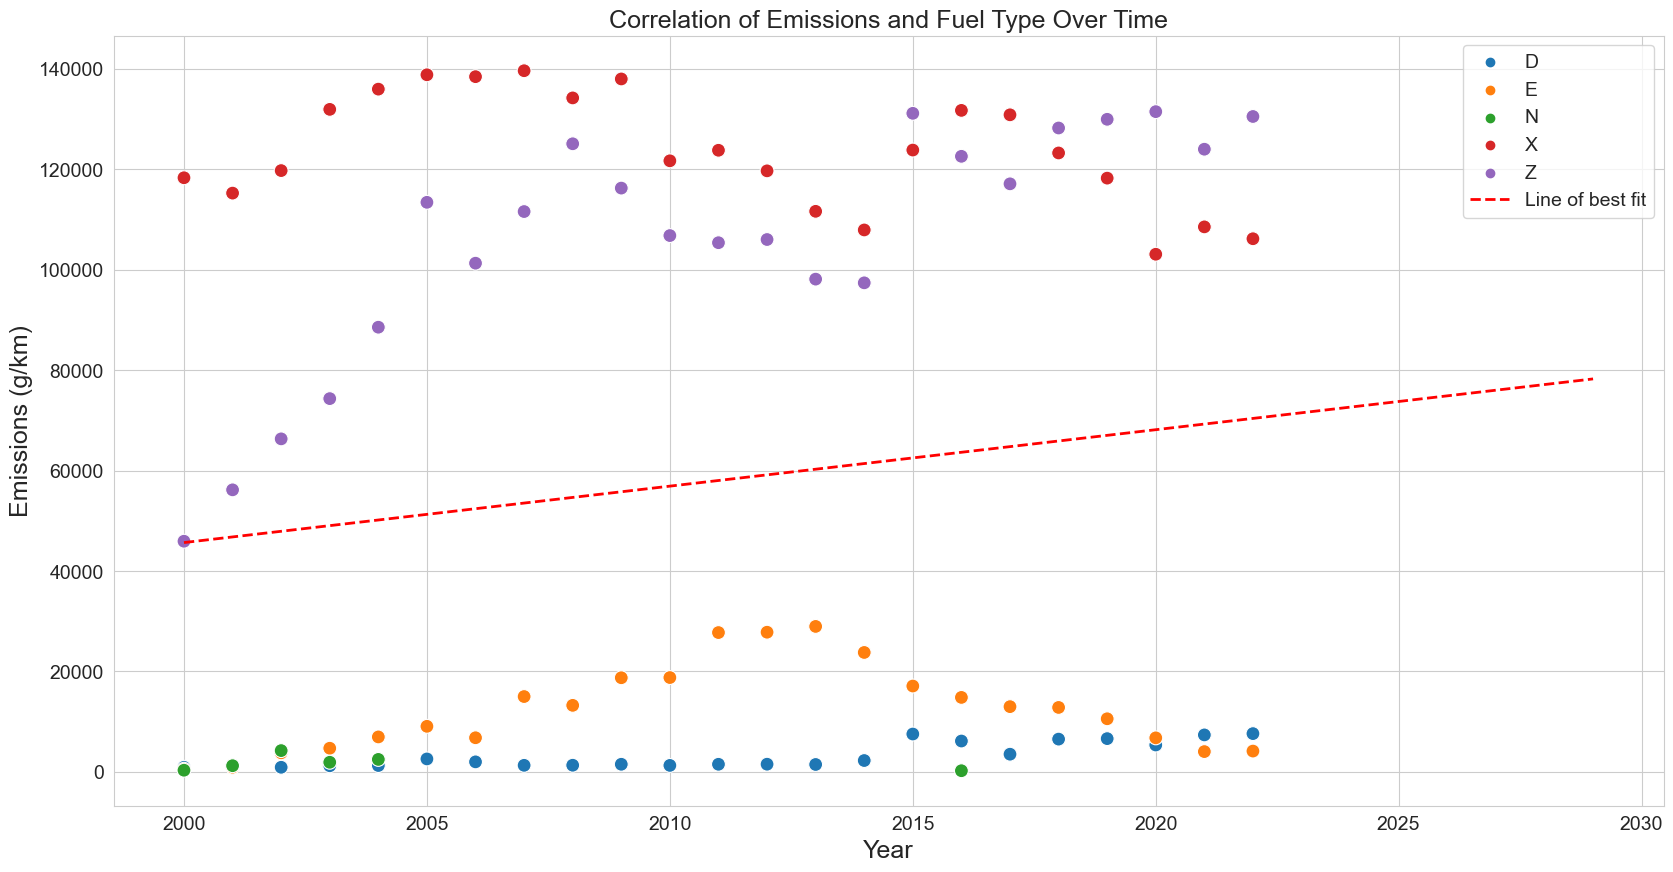

In [134]:
# set up format
plt.figure(figsize=(20, 10))

# plotting using seaborn scatterplot
sns.scatterplot(x='year', 
                y='emissions', 
                hue='fuel',
                s=100,
                data=corr_df);

# Plot the line of best fit
line_a = linregress(corr_df['year'], corr_df['emissions'])
x = np.arange(corr_df['year'].min(), 2030)
plt.plot(x, (line_a.intercept + line_a.slope * x),
       color='red',
       label='Line of best fit',
       linestyle='--',
       linewidth=2)

# Add labels and title
plt.xlabel('Year', fontsize=18)
plt.ylabel('Emissions (g/km)', fontsize=18)
plt.title('Correlation of Emissions and Fuel Type Over Time', fontsize=18)
plt.legend();

Indeed, there is a correlation between the type of fuel used in cars and the level of car emissions over time.

Different fuels have different chemical compositions, which can affect the amount and type of emissions produced when they are burned in an engine. For example, gasoline typically produces more carbon monoxide and nitrogen oxides, while diesel produces more particulate matter and nitrogen oxides. Ethanol and natural gas generally produce lower levels of emissions than gasoline and diesel(9).

Nevertheless, it's worth noticing that emissions from a car are influenced by a complex interplay of factors from fuel type to engine technology, vehicle age/conditions, equipped mission control systems etc. Thus, reducing emissions requires a holistic approach that addresses all of these factors(10).

#### Q5: Can we predict future fuel consumption and emissions in cars based on past trends and data

Let's redraw the graph from Q4 but with a twist!

In [172]:
# create sub data frame
avg_trend_df = (copy_df.groupby(['year'])['fuel_consumption', 'emissions']).mean().reset_index()

/var/folders/6p/xbsycnm16ls5ygb8lfftswd80000gn/T/ipykernel_11496/85916526.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_trend_df = (copy_df.groupby(['year'])['fuel_consumption', 'emissions']).mean().reset_index()


In [175]:
# create a sub routine to draw a graph with different data set
# precondition: data set
# postcondition: return a graph
def draw_plot(data):
    # set up the format for the figure that will contain 2 sub figures and its size
    fig, ax = plt.subplots(1, 2, figsize=(30, 10))

    # plotting the first graph using seaborn 
    sns.scatterplot(x='year', y='fuel_consumption', s=100, ax=ax[0], data=data);
    sns.regplot(x=data['year'], y=data['fuel_consumption'], ci=False, line_kws={'color':'red'}, ax=ax[0]);

    # Add labels and title
    ax[0].set_xlabel('Year', fontsize=18)
    ax[0].set_ylabel('Fuel Consumption (L/100km)', fontsize=18)
    ax[0].set_title('Fuel Consumption Over Time', fontsize=22)


    # plotting the second graph using seaborn 
    sns.scatterplot(x='year', y='emissions', s=100, ax=ax[1], data=data);
    sns.regplot(x=data['year'], y=data['emissions'], ci=False, line_kws={'color':'red'}, ax=ax[1]);

    # Add labels and title
    ax[1].set_xlabel('Year', fontsize=18)
    ax[1].set_ylabel('Emissions (g/km)', fontsize=18)
    ax[1].set_title('Car Emissions Over Time', fontsize=22)
    
    return plt.gca()

<AxesSubplot:title={'center':'Car Emissions Over Time'}, xlabel='Year', ylabel='Emissions (g/km)'>

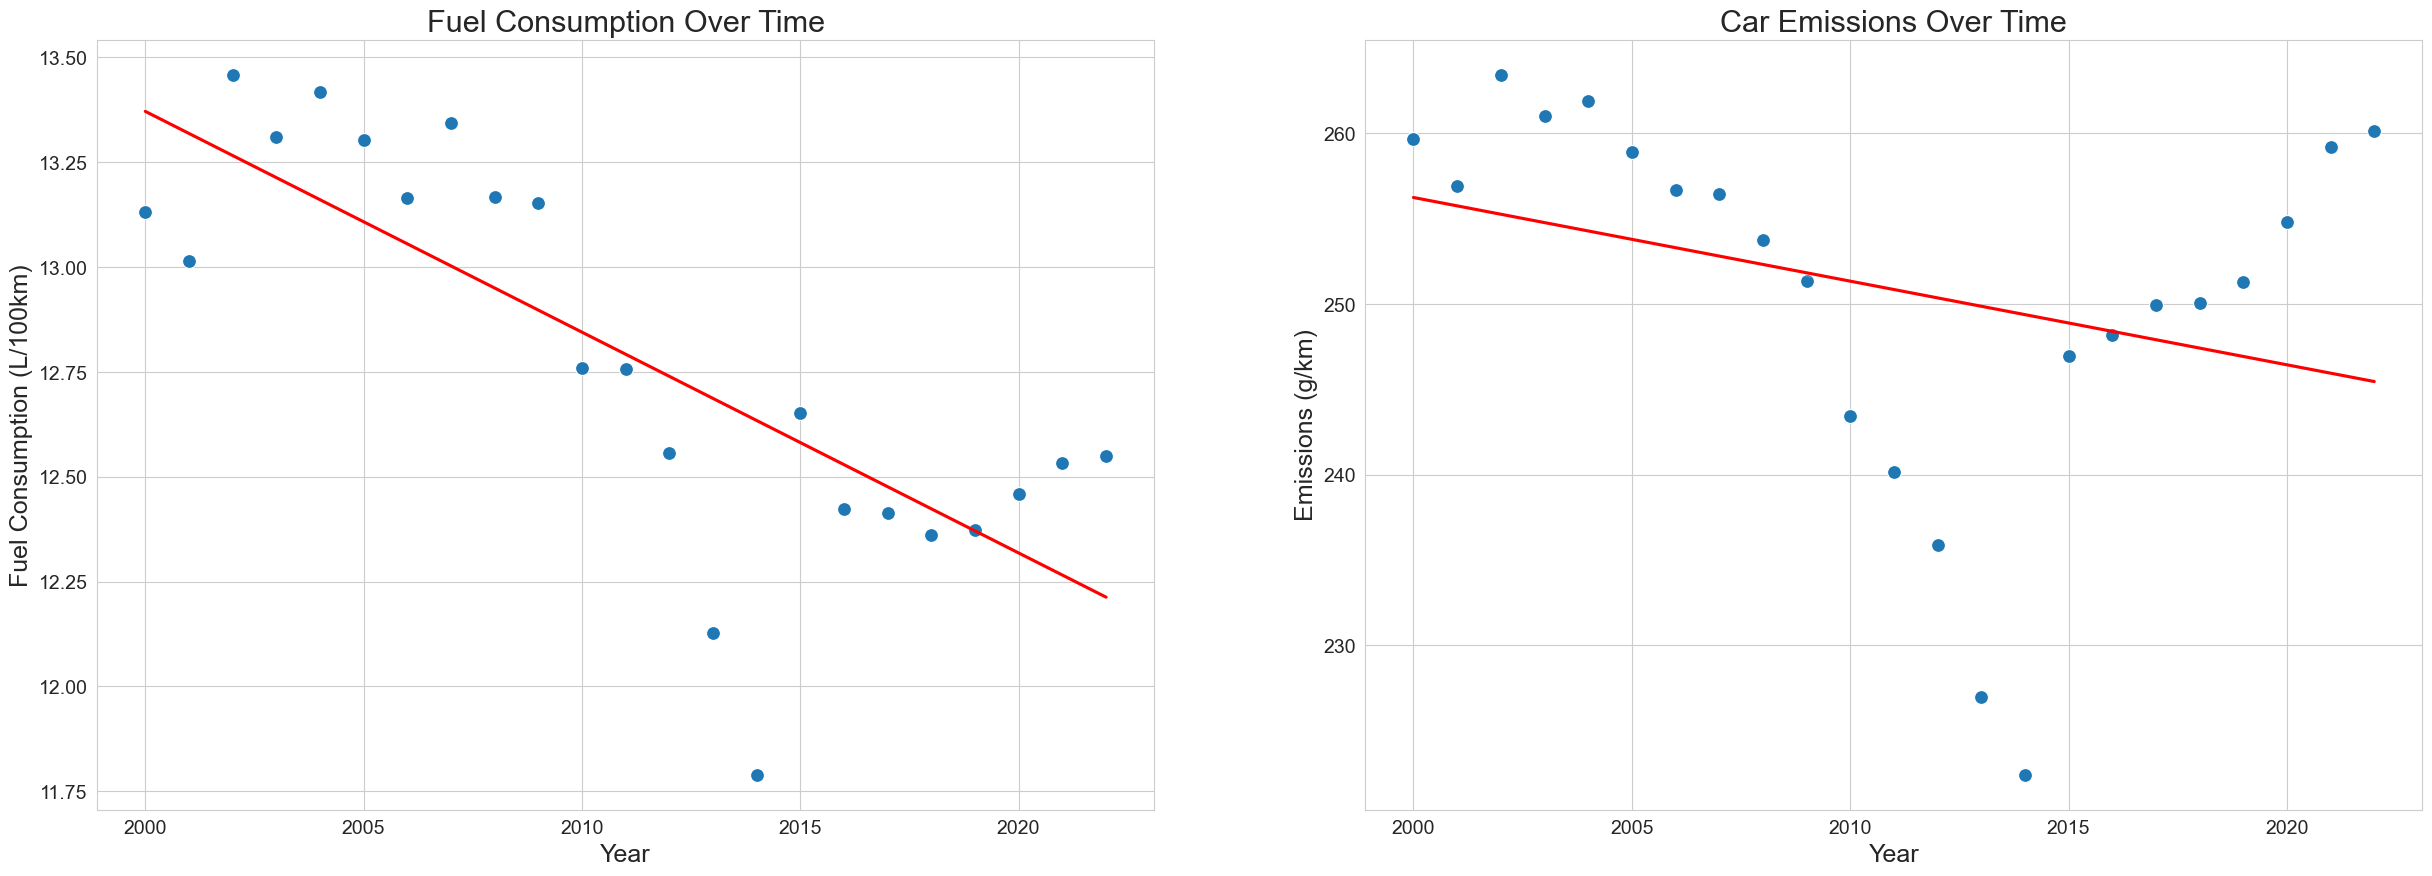

In [176]:
# call the function to draw graph for average fuel consumption and emissions over time
draw_plot(avg_trend_df)

Based on current trends and advancements in technology, iit is likely that average fuel consumption and emissions in cars will continue to decrease over time. This can be due to the implementation of stricter emissions regulations, advancements in engine technology, and the increasing adoption of electric and hybrid vehicles.

The global trend towards electric and hybrid vehicles is expected to increase, with the International Energy Agency (IEA) predicting that electric vehicles will account for over 50% of new car sales by 2040. This transition to electric and hybrid vehicles will lead to a significant reduction in fuel consumption and emissions from traditional gasoline and diesel-powered vehicles(11).

Additionally, stricter emissions regulations are expected to continue to be implemented globally, which will put pressure on automakers to develop more fuel-efficient and environmentally friendly vehicles. This, in turn, will lead to a reduction in fuel consumption and emissions in cars.

However, the total fuel consumption and emissions over the years yet have been increasing.

/var/folders/6p/xbsycnm16ls5ygb8lfftswd80000gn/T/ipykernel_11496/120947462.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_trend_df = (copy_df.groupby(['year'])['fuel_consumption', 'emissions']).sum().reset_index()


<AxesSubplot:title={'center':'Car Emissions Over Time'}, xlabel='Year', ylabel='Emissions (g/km)'>

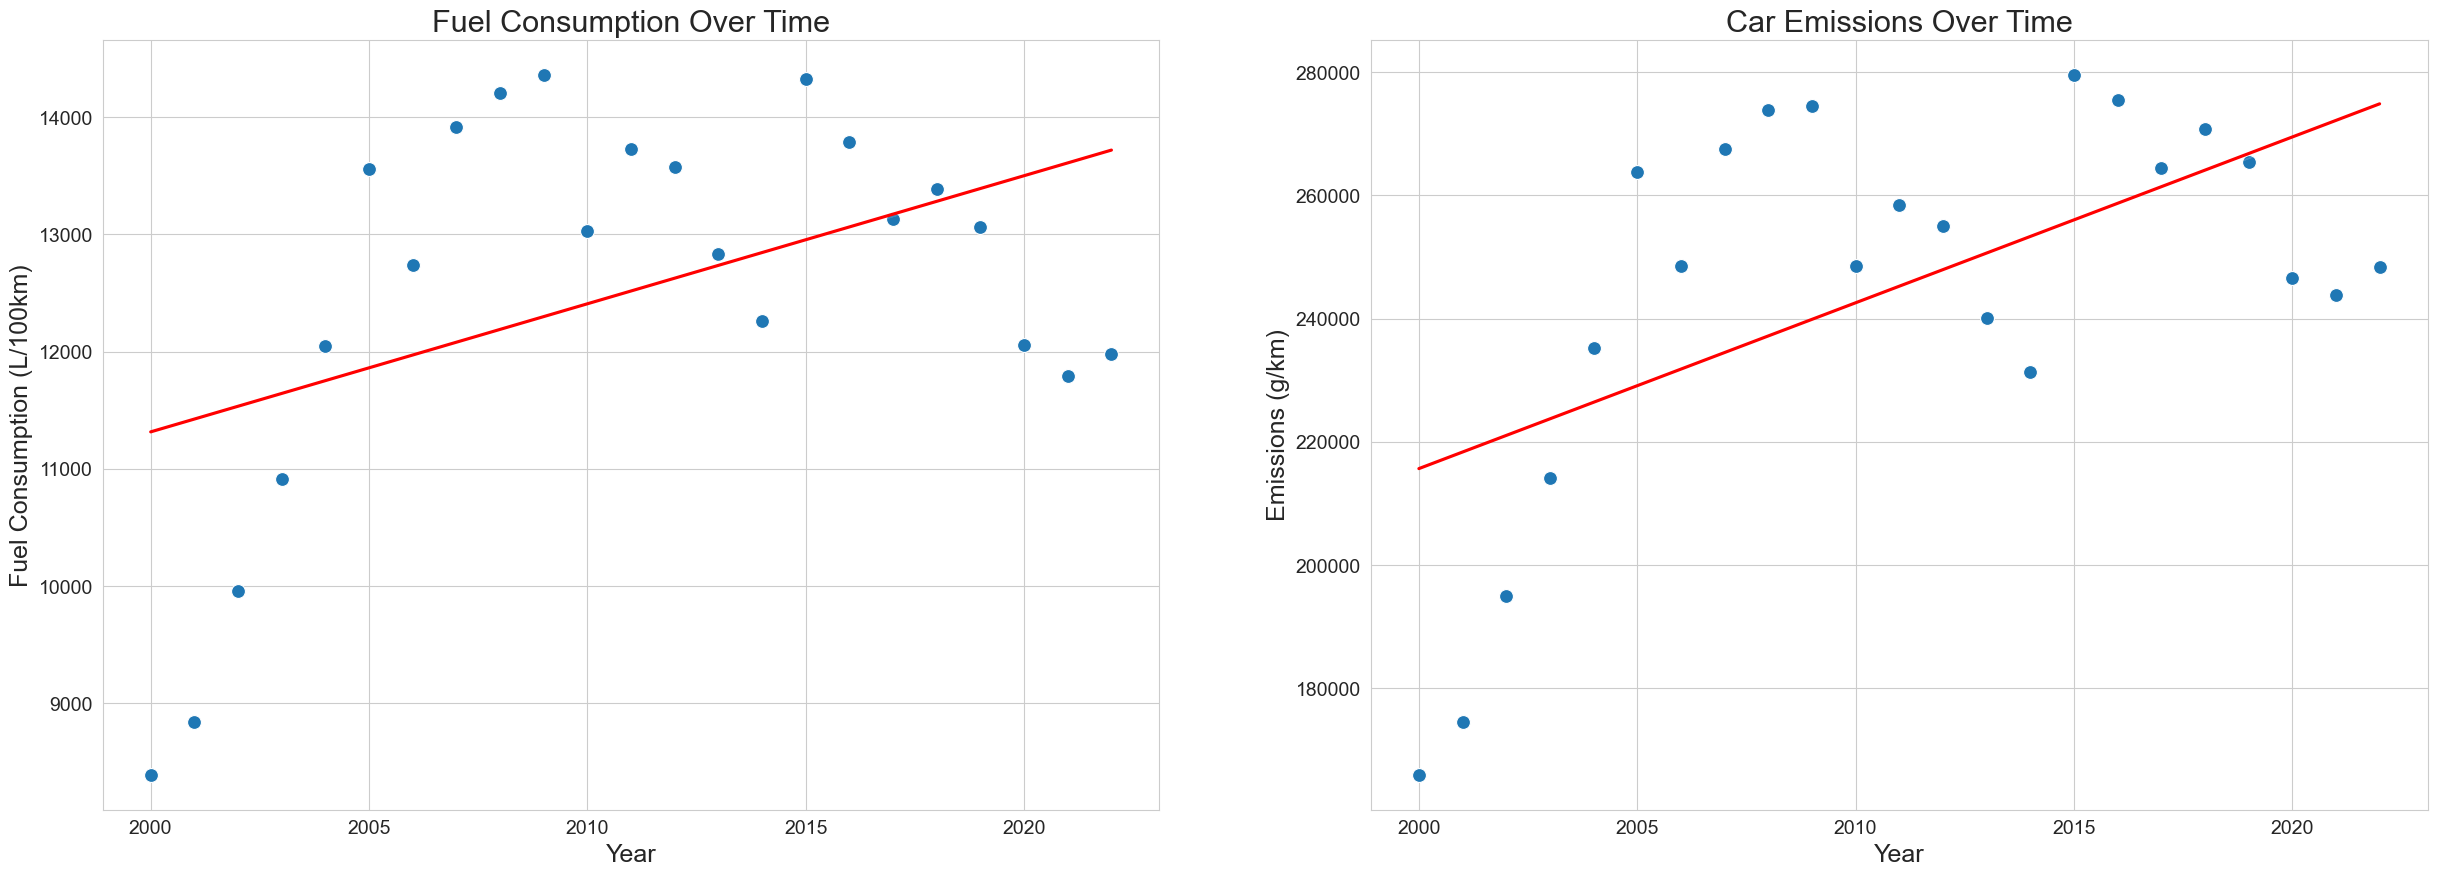

In [177]:
total_trend_df = (copy_df.groupby(['year'])['fuel_consumption', 'emissions']).sum().reset_index()

# call the function to draw graph for average fuel consumption and emissions over time
draw_plot(total_trend_df)

Some thoughts about the total fuel consumption:

- Fuel consumption has been increasing over the years due to several factors, including an increase in the number of vehicles on the road, the popularity of larger and heavier vehicles, and the lack of significant advancements in fuel efficiency.

- As countries around the world continue to develop and industrialize, the number of vehicles on the road has increased significantly. This increased demand for transportation has been leading to consuming more fuel consumption.

- While there have been advancements in fuel efficiency technology, such as hybrid and electric cars, these vehicles still make up a relatively small portion of the overall vehicle market. Furthermore, some of the gains in fuel efficiency have been offset by the increase in the popularity of larger vehicles.
    
Emissions:

- Again although there have been advancements in emission control technology, such as catalytic converters and particulate filters, these technologies have not kept pace with the increase in the number and size of vehicles on the road. Moreover, in some countries, emission regulations have been relaxed or not strictly enforced, leading to higher emissions from cars.

- As a result of the increasing emissions and their associated environmental impacts, many governments around the world have implemented policies aimed at reducing emissions from cars and promoting more sustainable transportation options, such as electric vehicles and public transportation. Additionally, car manufacturers have been investing in developing more efficient and lower-emission vehicles to meet stricter regulations and consumer demand for environmentally friendly options.

### Let us save and upload our work to Jovian before continuing.

In [28]:
import jovian

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## Inferences and Conclusion

The above analysis is only a reference regarding fuel consumption and emissions of different brands of cars. The fuel consumption value shows the fuel consumption that can be achieved by driving in a fuel efficient manner and properly maintaining the vehicle. Ratings help compare the fuel consumption of different vehicles. However, it is impossible for a lab test to simulate all the conditions a driver might experience. Vehicle fuel economy will vary from published fuel economy figures depending on when, where and how you drive.

The following factors will affect the fuel consumption of the vehicle:

- How one accelerates
- How fast one drives
- The age and condition of the vehicle
- Temperature and weather
- Traffic and road conditions
- Using air conditioning and other powered accessories
- Using all-wheel and four-wheel drive
- Also, there may be fuel consumption differences in the same make and model because of small variations in vehicle manufacturing. And some vehicles do not get their best fuel consumption until they have been driven for about 6,000 to 10,000 km.

Fuel consumption ratings can help consumers by providing them with reliable information about the vehicle's relative fuel efficiency. With this information, you can compare the fuel economy of different models and choose the most fuel-efficient vehicle for your daily needs.

Personally, when people shop, that fuel is an expense they pay for the long haul. Buying a fuel-efficient vehicle, driving it efficiently, and following the manufacturer's maintenance recommendations can save you money for years to come. If fuel prices go up, you can save even more.


## References 
(1) Automated Manual Transmission and its fuelconsumption: https://www.financialexpress.com/what-is/automated-manual-transmission-amt-meaning/1783545/

(2) Munal Transmisson and its fuel consumption: https://cartech.com.sa/en/media_center/drivingmanualtransmission_nwauto/

(3) Engine Size and Fuel Consumption: https://mechanics.stackexchange.com/questions/1352/engine-size-and-fuel-consumption

(4) Vehicle Emission Compliance Program and Emission Recall Cases: https://theicct.org/sites/default/files/publications/EPA-Compliance-and-Recall_ICCT_White-Paper_12042017_vF.pdf

(5) Bentley's commitment: https://www.bentleymotors.com/en/world-of-bentley/news/2020-news/bentley-outlines-beyond100-strategy.html

(6) Toyota's reducing car emissions mission: https://asia.nikkei.com/Spotlight/Environment/Climate-Change/Toyota-speeds-up-carbon-zero-target-for-factories-to-2035 

(7) Bugatti's commitment: https://www.bugatti.com/media/news/2021/earth-day-bugatti-committed-to-a-more-sustainable-future/

(8) Car models and CO2 emissions rule: https://www.which.co.uk/reviews/new-and-used-cars/article/car-emissions/car-co2-emissions-aRVNW9t0zLu6

(9) Emission by Fuel Types: https://ourworldindata.org/emissions-by-fuel

(10) To learn more about factors of car emissions: https://www.europarl.europa.eu/news/en/headlines/society/20190313STO31218/co2-emissions-from-cars-facts-and-figures-infographics

(11) Trends and Developments in Electric Vehicle Markets: https://www.iea.org/reports/global-ev-outlook-2021/trends-and-developments-in-electric-vehicle-markets

=> The more fuel a vehicle burns, the more greenhouse gases it produces, mostly in the form of carbon dioxide or CO2. About 2.3 kilograms of CO2 are produced for every liter of gasoline consumed by a vehicle. Although not directly harmful to health, CO2 emissions contribute to climate change.

Learn more about fuel consumption, how to drive as efficiently as possible, and more: https://natural-resources.canada.ca/energy-efficiency/transportation-alternative-fuels/fuel-consumption-guide/21002

In [54]:
import jovian

In [55]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "imhelendang/zerotopandas-course-project" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/imhelendang/zerotopandas-course-project


'https://jovian.com/imhelendang/zerotopandas-course-project'